## IEOR 4578 Forecasting 
### Online Retail II - Deliverable-2 
Source: https://archive.ics.uci.edu/dataset/502/online+retail+ii

#### Authors: Ishita Pundir (ip2441), Saum Kothari (sbk2171), Tushar Bura (tb3077)

In [1]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
year_10_11 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
year_9_10 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')

# Final dataframe
df = pd.concat([year_9_10, year_10_11], ignore_index = True)

### Exploratory Data Analysis (EDA)

In [3]:
# Basic examining of dataframe
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [5]:
#Unique Value Checking
for column in df.columns:
    print(column, len(df[column].unique()), df[column].unique())

Invoice 53628 [489434 489435 489436 ... 581585 581586 581587]
StockCode 5305 [85048 '79323P' '79323W' ... 23609 23617 23843]
Description 5699 ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity 1057 [    12     48     24 ...    698  80995 -80995]
InvoiceDate 47635 ['2009-12-01T07:45:00.000000000' '2009-12-01T07:46:00.000000000'
 '2009-12-01T09:06:00.000000000' ... '2011-12-09T12:31:00.000000000'
 '2011-12-09T12:49:00.000000000' '2011-12-09T12:50:00.000000000']
Price 2807 [   6.95    6.75    2.1  ...  933.17 1714.17  224.69]
Customer ID 5943 [13085. 13078. 15362. ... 15520. 13298. 12713.]
Country 43 ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unsp

#### Describe the Data

In [6]:
df.describe()

Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000

In [7]:
df.describe(include = 'object')

Invoice StockCode                         Description         Country
count   1067371   1067371                             1062989         1067371
unique    53628      5305                                5698              43
top      537434    85123A  WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
freq       1350      5829                                5918          981330

In [8]:
# Null Value Checking
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

**Insight:** We can see a lot of null values observed in "Description" and "Customer ID" columns in the dataset, let us try to handle this.

#### STEPS:
1. Dropping duplicate values from the dataset
2. Drop rows with missing Customer ID values

In [9]:
# Drop the duplicates from the dataset completely
df = df.drop_duplicates()
df

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                     ...    ...          ...             ...  
1067366 2011-12-09 12:50:00   2.10      12680.0          France  
1067367 2011-12-09 12:50:00   4.15      12680.0          France  
1067368 2011-12-09 12:50:00   4.15      12680.0          France  
1067369 2011-12-09 12:50:00   4.95      12680.0          France  
1067370 2011-12-09 12:50:00  18.00      12680.0          France  

[1033036 rows x 8 columns]

In [10]:
# Remove the rows which have missing Customer ID
df.dropna(subset = ['Customer ID'], inplace = True)

In [11]:
# Checking that null values are removed
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

**Insight:** We can observe that the rows which contained a null value in their description row were a subset of those where 'Customer_ID' is unknown, hence the issue is resolved!

In [12]:
# Reset the index of the dataset
df = df.reset_index(drop = True)
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

### Cleaning the Data

Our source of data is from: https://archive.ics.uci.edu/dataset/502/online+retail+ii

_On this website, we can see the following statement:_ This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

#### STEPS FOR FURTHER CLEANING:
1. Check if data lies outside the time interval provided in the code description
2. Make sure negative values in Price and Quantity columns are dropped, if any.


In [13]:
# Data outside the period 01.12.2009 to 09.12.2011
print((df.InvoiceDate >= '2011-12-09').sum())
print((df.InvoiceDate <= '2009-12-01').sum())

618
0


**Insight:** We can see that there are values that after before the time period 09/12/2011. We need to remove these values.

In [14]:
df = df[(df['InvoiceDate'] <= '2011-12-09') & (df['InvoiceDate'] >= '2009-12-01')]

In [15]:
# Check the negative values in the 'Quantity' and 'Price' columns
print((df.Quantity < 0).sum())
print((df.Price < 0).sum())

18383
0


**Insight:** We can see that there are values with negative quantity which is not possible. We need to remove these values.

In [16]:
# Remove the rows with negative values in the 'Quantity' and 'Price' columns
df = df[(df['Quantity'] >= 0)]

### Visualizations

In [17]:
# Creating segregations in Date as 'Year' and 'Month'
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
797262  581474     21253       SET OF PICTURE FRAME  STICKERS         1   
797263  581474     22108                PING! MICROWAVE PLATE         1   
797264  581474     22167           OVAL WALL MIRROR DIAMANTE          1   
797265  581474     21929       JUMBO BAG PINK VINTAGE PAISLEY         1   
797266  581474     20717               STRAWBERRY SHOPPER BAG         1   

               InvoiceDate  Price  Customer ID         Country  InvoiceYear  \
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom         2009   
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom         2009   
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom         2009   
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom         2009   
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom         2009   
...                    ...    ...          ...             ...          ...   
797262 2011-12-08 20:01:00   0.79      12748.0  United Kingdom         2011   
797263 2011-12-08 20:01:00   1.25      12748.0  United Kingdom         2011   
797264 2011-12-08 20:01:00   9.95      12748.0  United Kingdom         2011   
797265 2011-12-08 20:01:00   2.08      12748.0  United Kingdom         2011   
797266 2011-12-08 20:01:00   1.25      12748.0  United Kingdom         2011   

        InvoiceMonth  
0                 12  
1                 12  
2                 12  
3                 12  
4                 12  
...              ...  
797262            12  
797263            12  
797264            12  
797265            12  
797266            12  

[778884 rows x 10 columns]

In [18]:
# Creating the 'Revenue' column which is a linear product of Price and Quantity
df['Revenue'] = df['Quantity'] * df['Price']

In [19]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'InvoiceYear', 'InvoiceMonth',
       'Revenue'],
      dtype='object')

### Invoice Yearly Distribution

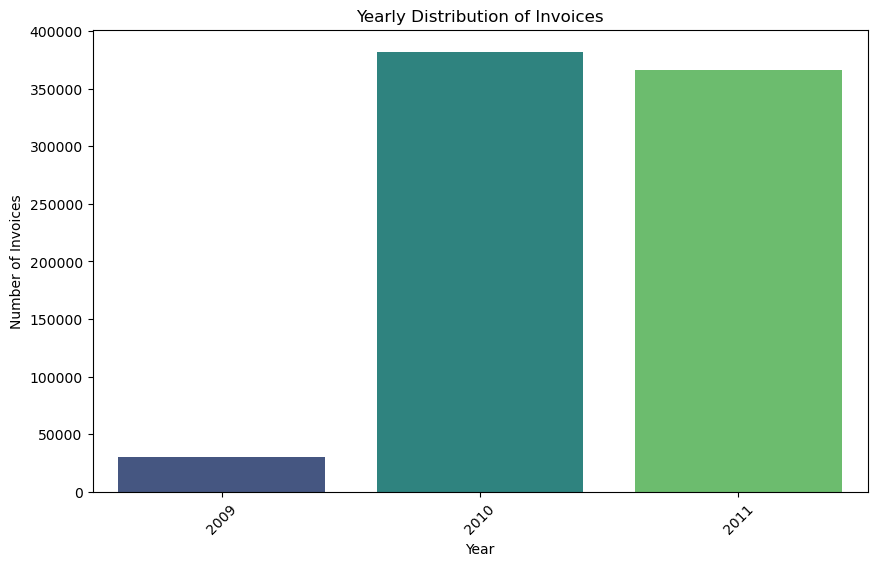

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InvoiceYear', data=df, palette='viridis')
plt.title('Yearly Distribution of Invoices')
plt.xlabel('Year')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.show()

### Customer Count vs Country

In [21]:
# Count the Customer ID and group by Country and InvoiceYear
customerid_country = df.groupby(['Country', 'InvoiceYear'])['Customer ID'].count().sort_values(ascending=False).reset_index()
customerid_country

Country  InvoiceYear  Customer ID
0   United Kingdom         2010       346531
1   United Kingdom         2011       325338
2   United Kingdom         2009        28135
3          Germany         2011         8433
4             EIRE         2010         8172
..             ...          ...          ...
90    Saudi Arabia         2011            9
91         Denmark         2009            8
92         Finland         2009            4
93          Sweden         2009            2
94             USA         2009            1

[95 rows x 3 columns]

[]

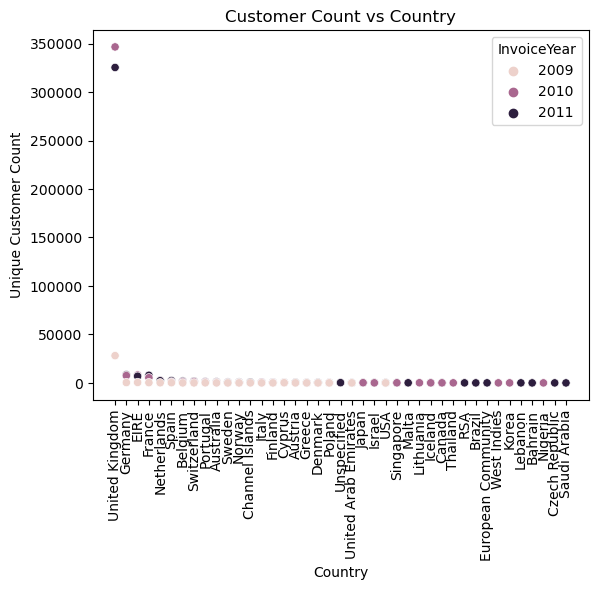

In [22]:
customerid_vs_country = sns.scatterplot(x = 'Country', y = 'Customer ID', hue = 'InvoiceYear', data = customerid_country)
customerid_vs_country.set_xlabel('Country')
customerid_vs_country.set_ylabel('Unique Customer Count')
customerid_vs_country.set_title('Customer Count vs Country')
plt.xticks(rotation=90)
plt.plot()

### Monthly Invoice Distribution

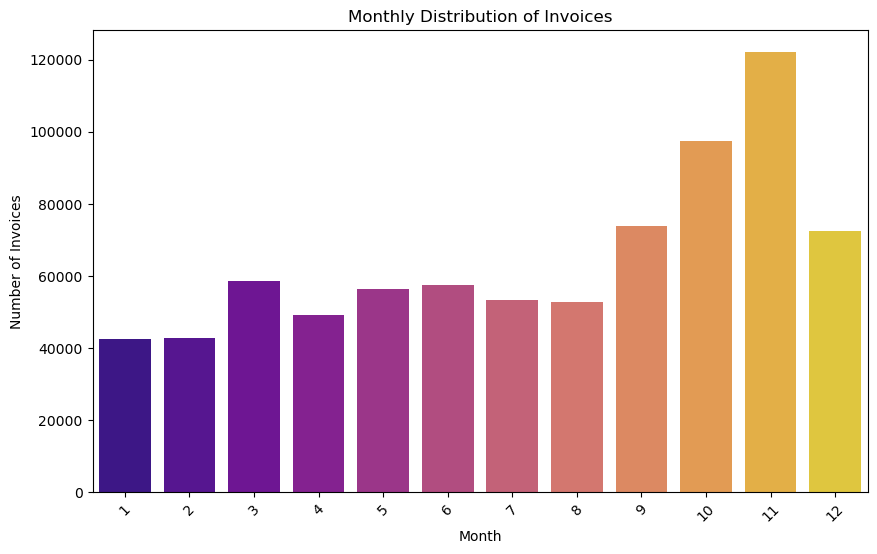

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InvoiceMonth', data=df, palette='plasma')
plt.title('Monthly Distribution of Invoices')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.show()

### Quantity vs. Price Scatter Plot

/var/folders/9t/jwr0675520x7pzpgdly3cs3c0000gn/T/ipykernel_46814/1863001814.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Quantity', y='Price', data=df, palette='magma')


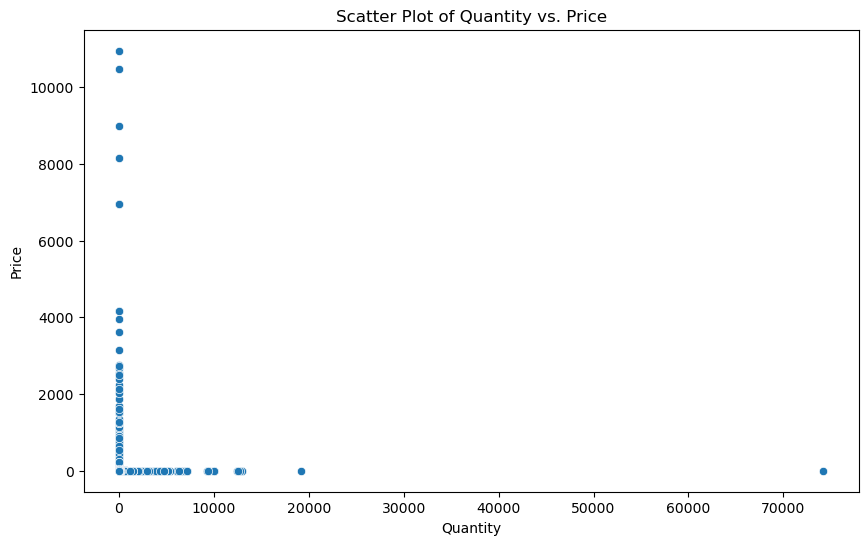

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price', data=df, palette='magma')
plt.title('Scatter Plot of Quantity vs. Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

### Invoice Distribution by Country

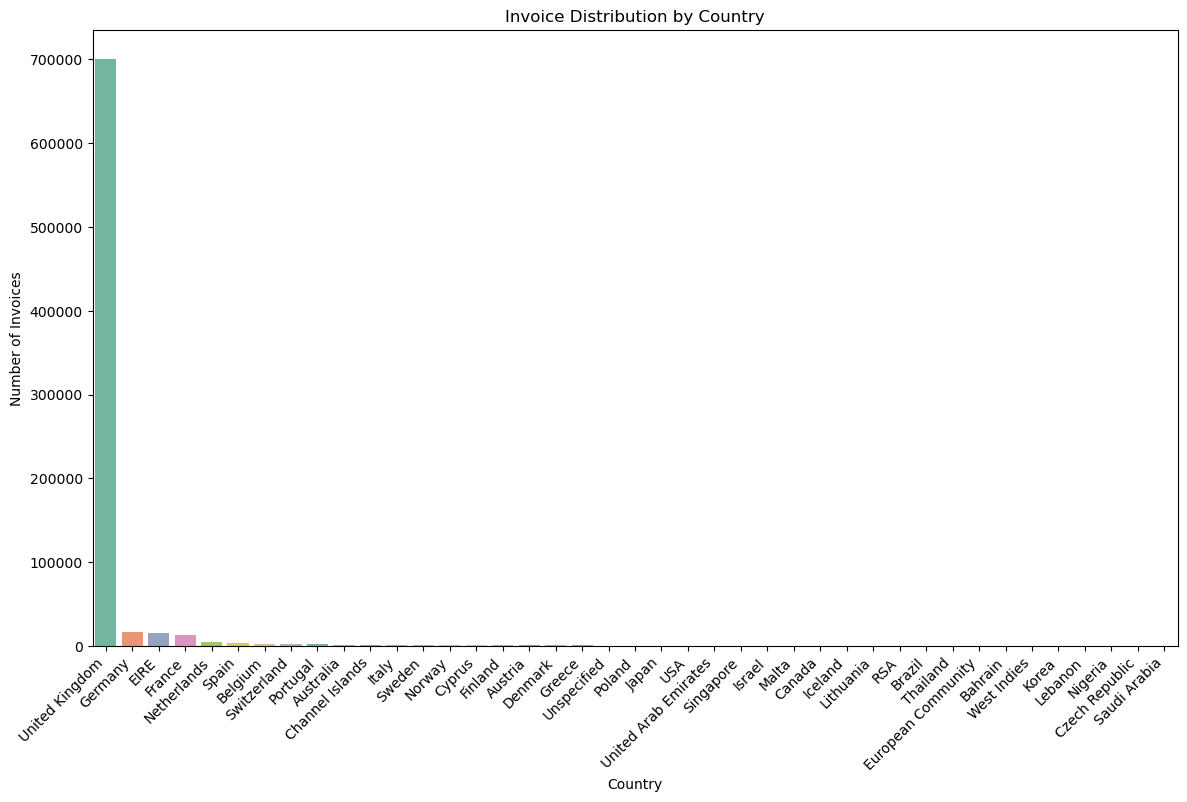

In [25]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Country', data=df, palette='Set2', order=df['Country'].value_counts().index)
plt.title('Invoice Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45, ha='right')
plt.show()

### Distribution of Quantity per Invoice

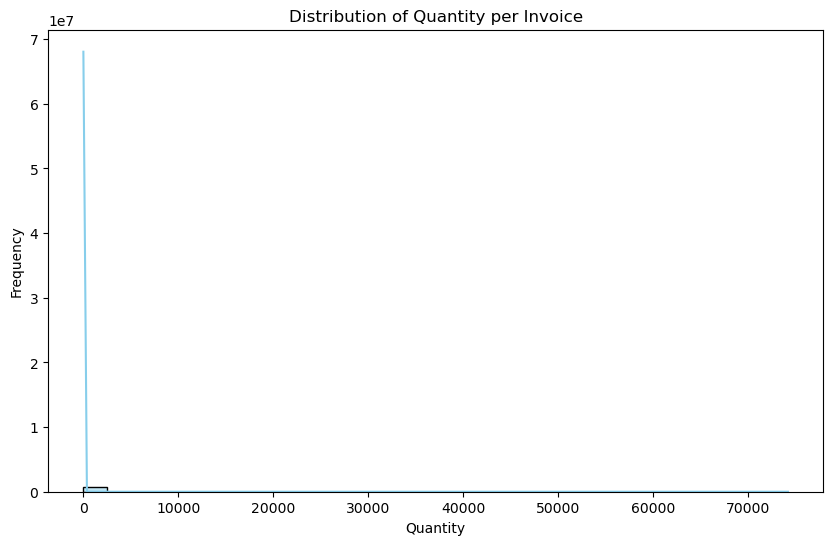

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Quantity per Invoice')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

### Monthly Revenue Trend

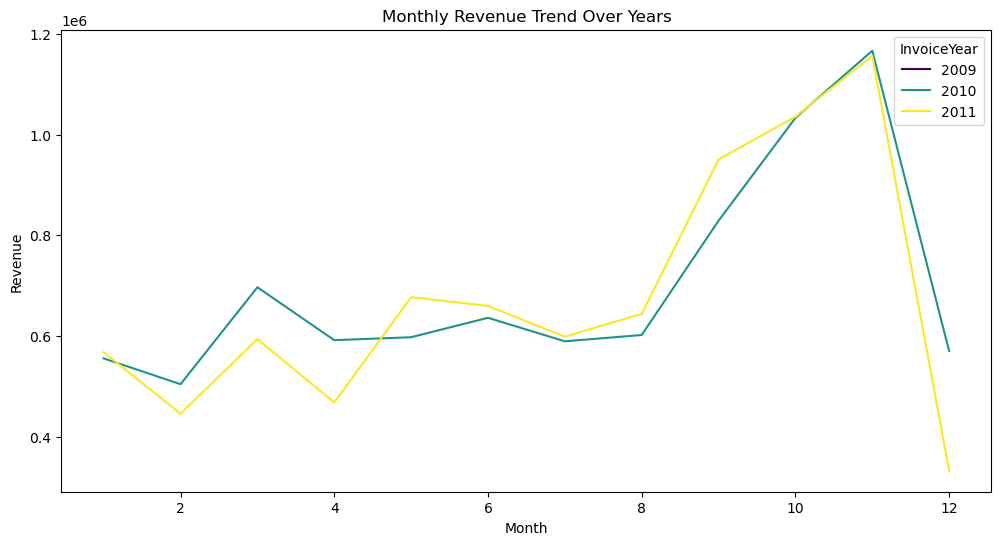

In [27]:
monthly_revenue = df.groupby(['InvoiceYear', 'InvoiceMonth'])['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue['InvoiceMonth'], y=monthly_revenue['Revenue'], hue=monthly_revenue['InvoiceYear'], palette='viridis')
plt.title('Monthly Revenue Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

### Monthly Revenue Growth Rate

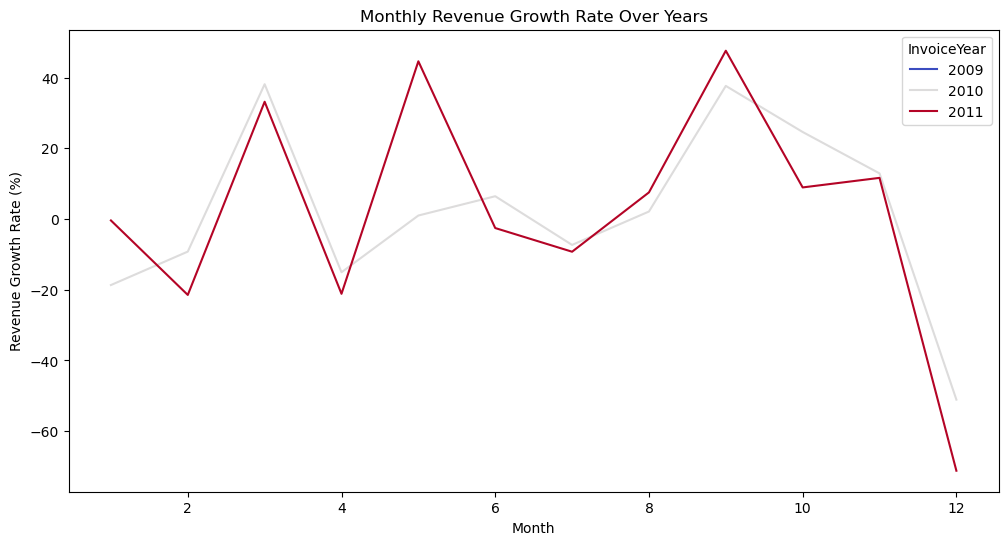

In [28]:
monthly_revenue['Revenue Growth Rate'] = monthly_revenue['Revenue'].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue['InvoiceMonth'], y=monthly_revenue['Revenue Growth Rate'], hue=monthly_revenue['InvoiceYear'], palette='coolwarm')
plt.title('Monthly Revenue Growth Rate Over Years')
plt.xlabel('Month')
plt.ylabel('Revenue Growth Rate (%)')
plt.show()

### Revenue based on Country

In [29]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head().reset_index()
country_revenue

Country       Revenue
0  United Kingdom  1.420969e+07
1            EIRE  6.165705e+05
2     Netherlands  5.540381e+05
3         Germany  4.233300e+05
4          France  3.485015e+05

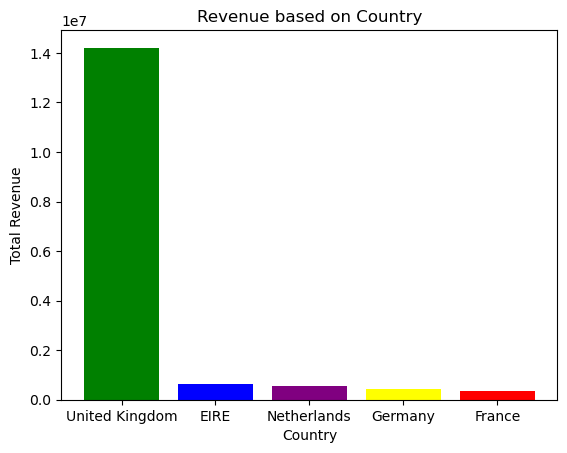

In [30]:
colors = ['Green', 'Blue', 'Purple', 'Yellow', 'Red']
plt.bar(country_revenue['Country'], country_revenue['Revenue'], color = colors)
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Revenue based on Country')
plt.show()

### Quantity Purchase by Country

In [31]:
qty_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index().head(5)
qty_country

Country  Quantity
0  United Kingdom   8458784
1     Netherlands    384519
2            EIRE    318271
3          France    270183
4         Denmark    237471

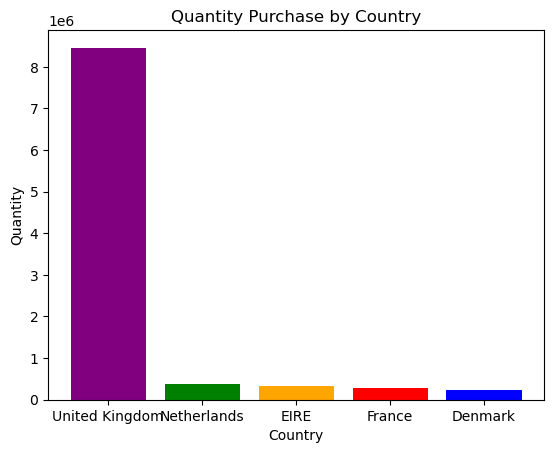

In [32]:
# PLot the bar graph
colors = ['Purple', 'Green', 'Orange', 'Red', 'Blue']
plt.bar(qty_country['Country'], qty_country['Quantity'], color = colors)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Quantity Purchase by Country')
plt.show()

### Quantity vs Customer ID according to the Country

In [33]:
# Count of quantity and group by Customer ID and Country
customerid_quantity = df.groupby(['Customer ID', 'Country'])['Quantity'].sum().sort_values(ascending=False).reset_index().head(100)
customerid_quantity

Customer ID         Country  Quantity
0       14646.0     Netherlands    367833
1       13902.0         Denmark    220600
2       13694.0  United Kingdom    188201
3       18102.0  United Kingdom    181501
4       14156.0            EIRE    164325
..          ...             ...       ...
95      14667.0  United Kingdom     11939
96      16746.0  United Kingdom     11900
97      14849.0  United Kingdom     11838
98      12731.0          France     11641
99      13199.0  United Kingdom     11567

[100 rows x 3 columns]

[]

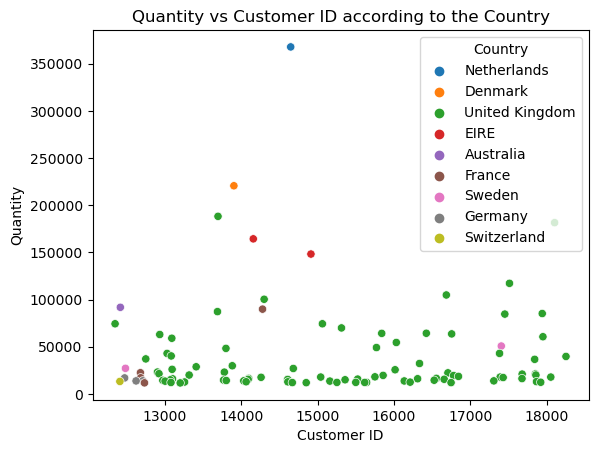

In [34]:
# Create scatter plot
customerid_vs_quantity = sns.scatterplot(x = 'Customer ID', y = 'Quantity', hue = 'Country', data = customerid_quantity)
customerid_vs_quantity.set_xlabel('Customer ID')
customerid_vs_quantity.set_ylabel('Quantity')
customerid_vs_quantity.set_title('Quantity vs Customer ID according to the Country')
plt.plot()

### Percentage Revenue based on Top 10 Customers

In [35]:
# Total revenue of each Customer ID
customerid_revenue = df.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)
customerid_revenue

Customer ID
18102.0    580517.60
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
13694.0    195640.69
17511.0    172132.87
16684.0    147142.77
12415.0    144458.37
15061.0    126389.02
Name: Revenue, dtype: float64

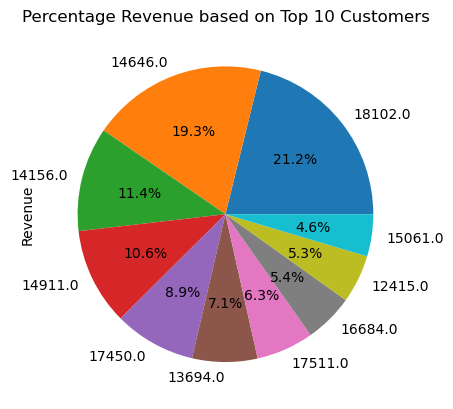

In [36]:
# Plot the pie chart
customerid_revenue.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Percentage Revenue based on Top 10 Customers')
plt.show()

### Frequent Top Customer Visits

In [37]:
# Count of the Invoice No for each Customer ID
invoiceno_customerid = df.groupby('Customer ID')['Invoice'].count().sort_values(ascending=False).head(10)
invoiceno_customerid

Customer ID
17841.0    12435
14911.0    11079
12748.0     6563
14606.0     6359
14096.0     5111
15311.0     4286
14156.0     4038
14646.0     3854
13089.0     3316
16549.0     3093
Name: Invoice, dtype: int64

In [38]:
# Change the style of the pie chart
plt.style.use('seaborn-v0_8-white')

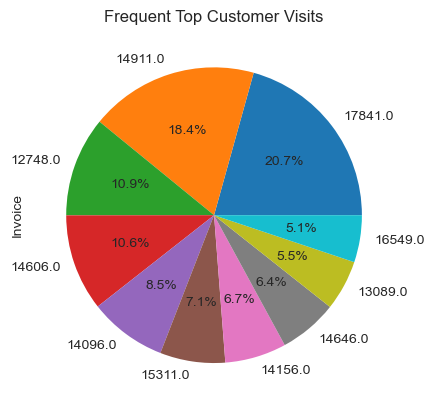

In [39]:
# Plot the pie chart
invoiceno_customerid.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Frequent Top Customer Visits')
plt.show()

### Top 5 Customers Purchasing Behavior over Time

In [40]:
# Find the top 5 customers
top_customers = df['Customer ID'].value_counts().head(5)
top_customers

17841.0    12435
14911.0    11079
12748.0     6563
14606.0     6359
14096.0     5111
Name: Customer ID, dtype: int64

In [41]:
# Filter the top 5 customers
filtered_df = df[df['Customer ID'].isin(top_customers.index)]

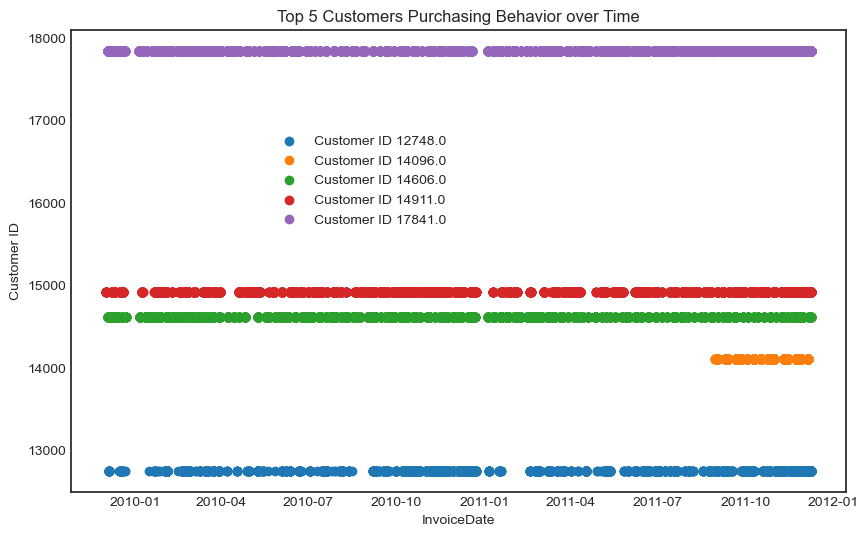

In [42]:
# Crete the scatter plot
plt.figure(figsize=(10, 6))
for customer_id, group in filtered_df.groupby('Customer ID'):
    plt.scatter(group['InvoiceDate'], [customer_id] * len(group), label=f'Customer ID {customer_id}')

plt.xlabel('InvoiceDate')
plt.ylabel('Customer ID')
plt.title('Top 5 Customers Purchasing Behavior over Time')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.8))
plt.show()

### Customer Distribution by Quantity Range

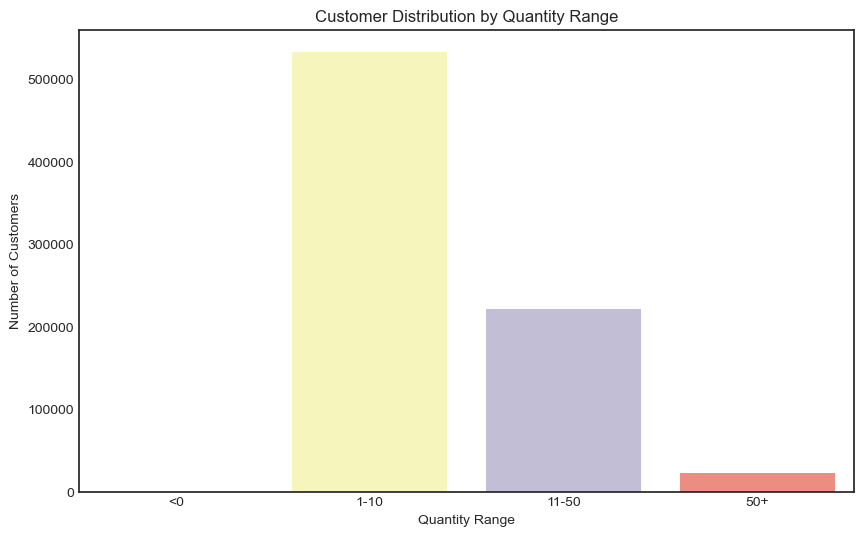

In [43]:
df['QuantityRange'] = pd.cut(df['Quantity'], bins=[-np.inf, 0, 10, 50, np.inf], labels=['<0', '1-10', '11-50', '50+'])
plt.figure(figsize=(10, 6))
sns.countplot(x='QuantityRange', data=df, palette='Set3')
plt.title('Customer Distribution by Quantity Range')
plt.xlabel('Quantity Range')
plt.ylabel('Number of Customers')
plt.show()

### Weekly Sales Trend

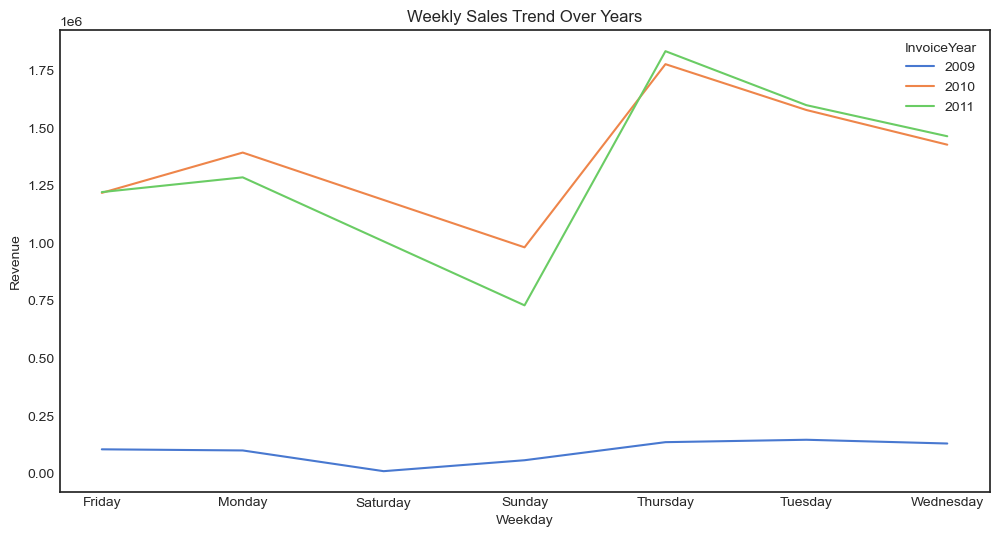

In [44]:
df['Weekday'] = df['InvoiceDate'].dt.day_name()
weekly_sales = df.groupby(['InvoiceYear', 'Weekday'])['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_sales['Weekday'], y=weekly_sales['Revenue'], hue=weekly_sales['InvoiceYear'], palette='muted')
plt.title('Weekly Sales Trend Over Years')
plt.xlabel('Weekday')
plt.ylabel('Revenue')
plt.show()

### Monthly Quantity Sold by Country

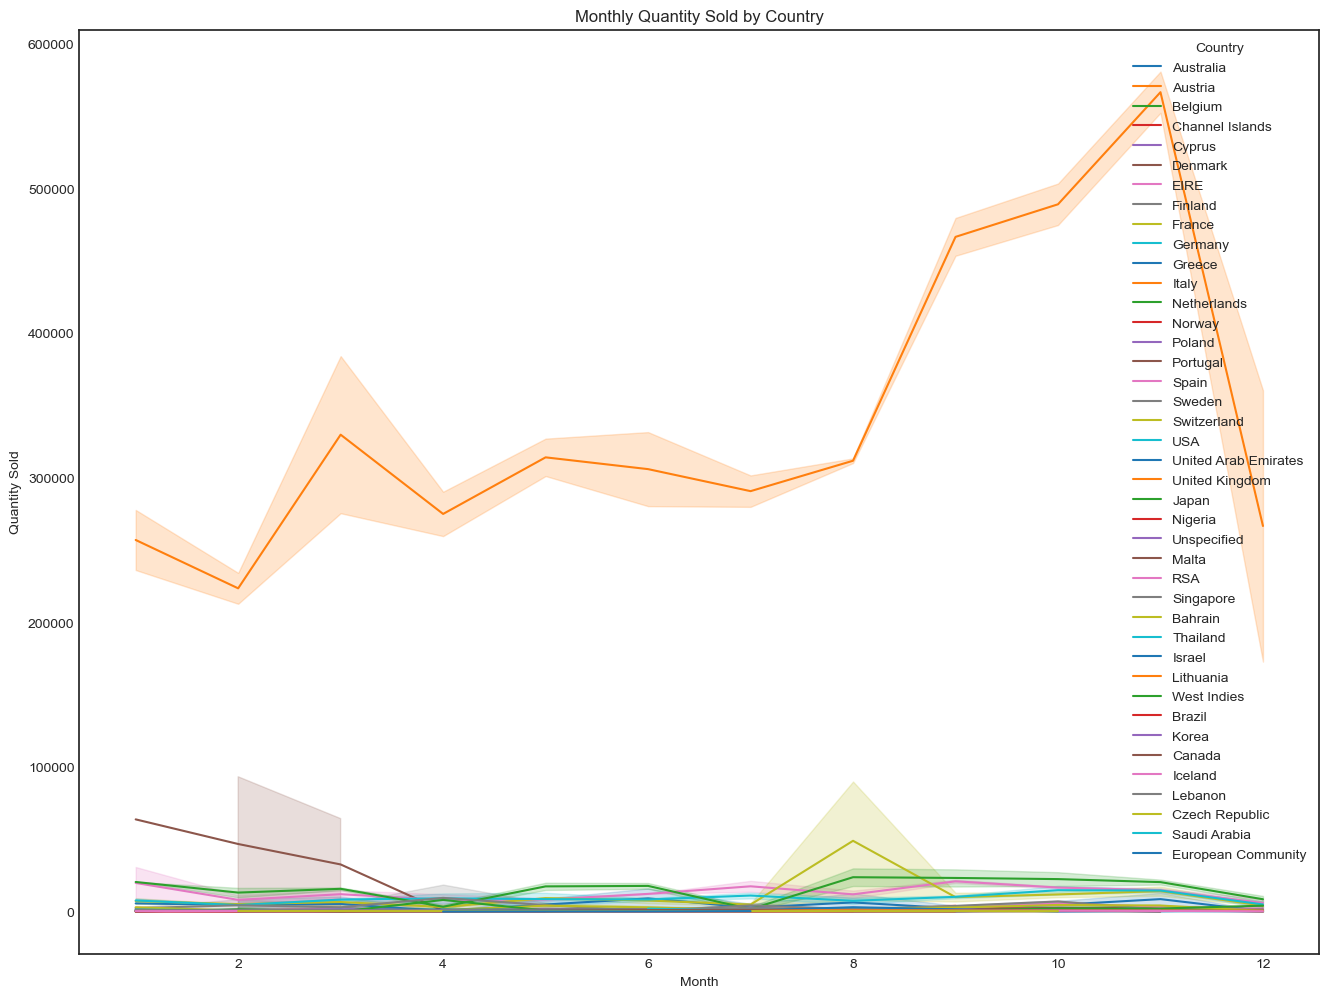

In [45]:
monthly_quantity_country = df.groupby(['InvoiceYear', 'InvoiceMonth', 'Country'])['Quantity'].sum().reset_index()

plt.figure(figsize=(16, 12))
sns.lineplot(x=monthly_quantity_country['InvoiceMonth'], y=monthly_quantity_country['Quantity'], hue=monthly_quantity_country['Country'], palette='tab10')
plt.title('Monthly Quantity Sold by Country')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()

### Month wise Stock code

In [46]:
# Count of the stockcode and group by InvoiceYear and InvoiceMonth
invoicemonth_stockcode = df.groupby(['InvoiceYear', 'InvoiceMonth'])['StockCode'].count().reset_index()
invoicemonth_stockcode

InvoiceYear  InvoiceMonth  StockCode
0          2009            12      30279
1          2010             1      21461
2          2010             2      23042
3          2010             3      31783
4          2010             4      26834
5          2010             5      28233
6          2010             6      30691
7          2010             7      26644
8          2010             8      26030
9          2010             9      34131
10         2010            10      48725
11         2010            11      58909
12         2010            12      25673
13         2011             1      20991
14         2011             2      19707
15         2011             3      26872
16         2011             4      22435
17         2011             5      28075
18         2011             6      26926
19         2011             7      26582
20         2011             8      26796
21         2011             9      39671
22         2011            10      48796
23         2011            11      63182
24         2011            12      16416

In [47]:
# Change the style of the bar graph
plt.style.use('seaborn-v0_8-bright')

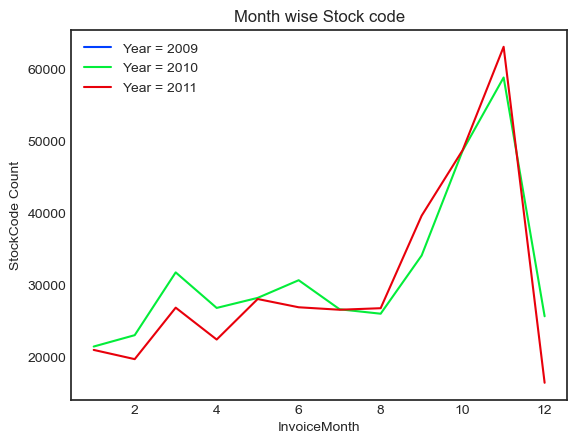

In [48]:
# Seperate line for each InvoiceYear
invoiceyears = invoicemonth_stockcode['InvoiceYear'].unique()

for year in invoiceyears:
    data = invoicemonth_stockcode[invoicemonth_stockcode['InvoiceYear'] == year]
    plt.plot(data['InvoiceMonth'], data['StockCode'], label = f'Year = {year}')

plt.xlabel('InvoiceMonth')
plt.ylabel('StockCode Count')
plt.title('Month wise Stock code')
plt.legend()
plt.show()

### Sales Trends Over Time

In [49]:
# Group the data according to InvoiceYear and InvoiceMonth and get the total quantity for each month
date_vs_quantity = df.groupby(['InvoiceYear', 'InvoiceMonth'])['Quantity'].sum().reset_index()
date_vs_quantity

InvoiceYear  InvoiceMonth  Quantity
0          2009            12    398708
1          2010             1    370128
2          2010             2    371871
3          2010             3    502101
4          2010             4    350604
5          2010             5    384960
6          2010             6    389880
7          2010             7    324638
8          2010             8    452551
9          2010             9    567806
10         2010            10    596497
11         2010            11    653074
12         2010            12    311063
13         2011             1    348522
14         2011             2    265043
15         2011             3    347623
16         2011             4    291369
17         2011             5    372948
18         2011             6    363014
19         2011             7    367372
20         2011             8    398190
21         2011             9    543654
22         2011            10    591551
23         2011            11    678760
24         2011            12    196225

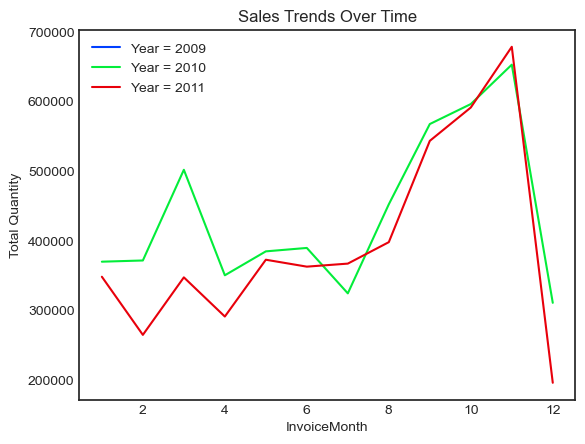

In [50]:
# Seperate line for each InvoiceYear
invoiceyears = date_vs_quantity['InvoiceYear'].unique()

for year in invoiceyears:
    data = date_vs_quantity[date_vs_quantity['InvoiceYear'] == year]
    colors = ['Blue', 'Red']
    plt.plot(data['InvoiceMonth'], data['Quantity'], label = f'Year = {year}')
    
plt.xlabel('InvoiceMonth')
plt.ylabel('Total Quantity')
plt.title('Sales Trends Over Time')
plt.legend()
plt.show()

### Cumulative Revenue Over Time

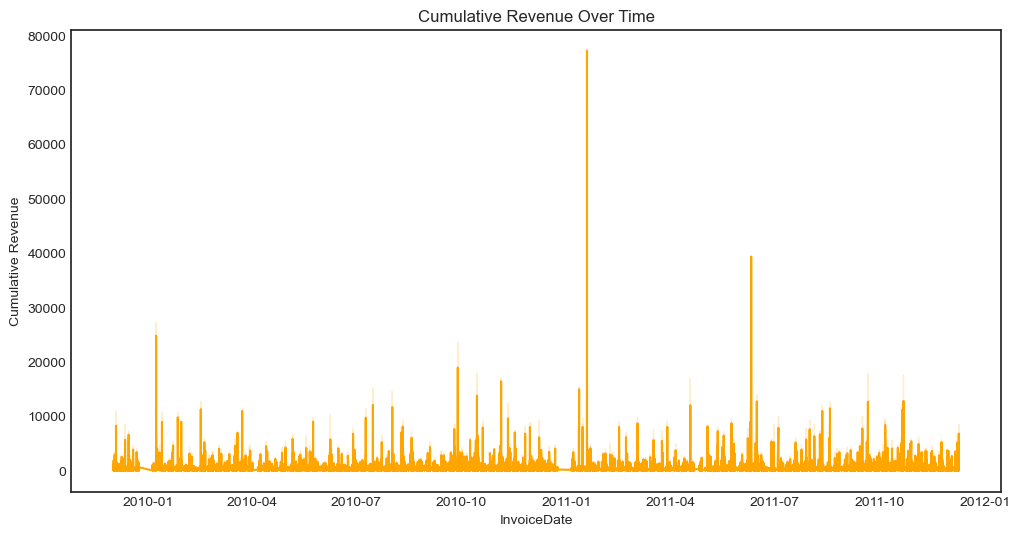

In [51]:
df['CumulativeRevenue'] = df.groupby('InvoiceDate')['Revenue'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df['InvoiceDate'], y=df['CumulativeRevenue'], color='orange')
plt.title('Cumulative Revenue Over Time')
plt.xlabel('InvoiceDate')
plt.ylabel('Cumulative Revenue')
plt.show()

### Customer Purchasing Behavior

In [52]:
# Group the data according to InvoiceYear and InvoiceMonth and get the total count of Customer ID
customerid_vs_invoicedate = df.groupby(['InvoiceYear', 'InvoiceMonth'])['Customer ID'].count().reset_index()
customerid_vs_invoicedate

InvoiceYear  InvoiceMonth  Customer ID
0          2009            12        30279
1          2010             1        21461
2          2010             2        23042
3          2010             3        31783
4          2010             4        26834
5          2010             5        28233
6          2010             6        30691
7          2010             7        26644
8          2010             8        26030
9          2010             9        34131
10         2010            10        48725
11         2010            11        58909
12         2010            12        25673
13         2011             1        20991
14         2011             2        19707
15         2011             3        26872
16         2011             4        22435
17         2011             5        28075
18         2011             6        26926
19         2011             7        26582
20         2011             8        26796
21         2011             9        39671
22         2011            10        48796
23         2011            11        63182
24         2011            12        16416

In [53]:
# Change the style of the line graph
plt.style.use('seaborn-v0_8-ticks')

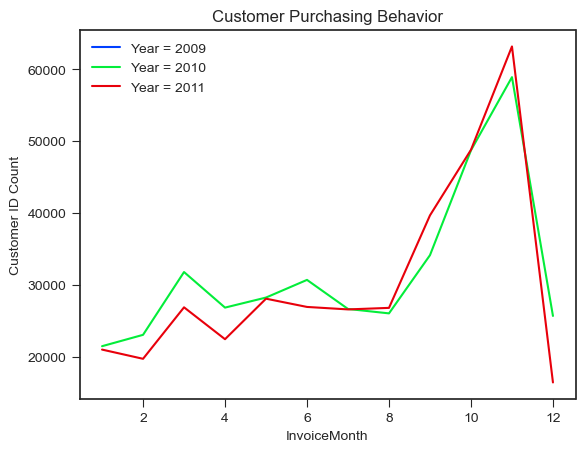

In [54]:
# Seperate line for each InvoiceYear
invoiceyears = date_vs_quantity['InvoiceYear'].unique()

for year in invoiceyears:
    data = customerid_vs_invoicedate[customerid_vs_invoicedate['InvoiceYear'] == year]
    plt.plot(data['InvoiceMonth'], data['Customer ID'], label = f'Year = {year}')
    
plt.xlabel('InvoiceMonth')
plt.ylabel('Customer ID Count')
plt.title('Customer Purchasing Behavior')
plt.legend()
plt.show()

### Monthly Sales Heatmap

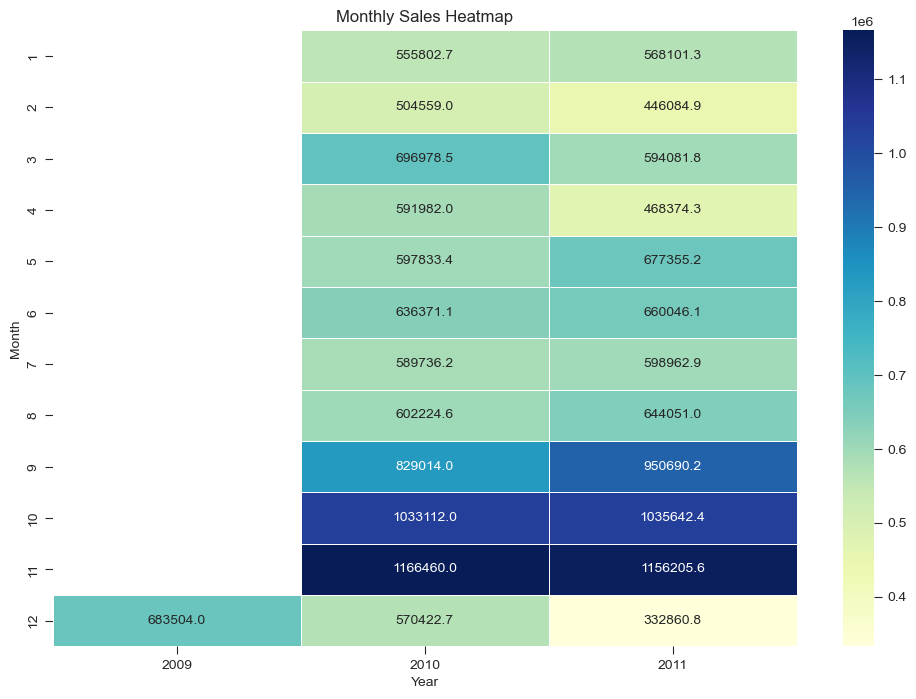

In [55]:
monthly_sales_pivot = df.pivot_table(index='InvoiceMonth', columns='InvoiceYear', values='Revenue', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales_pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Monthly Sales Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


### Unit price with Quantity

In [56]:
# Calculate the total count of quantity and group by price and sort
quantity_price = df.groupby('Price')['Quantity'].count().sort_values(ascending=False).head(10)
quantity_price

Price
1.25    94463
1.65    68825
2.95    60631
0.85    59334
0.42    41044
2.10    39187
3.75    36904
4.95    32419
1.95    31790
2.55    29443
Name: Quantity, dtype: int64

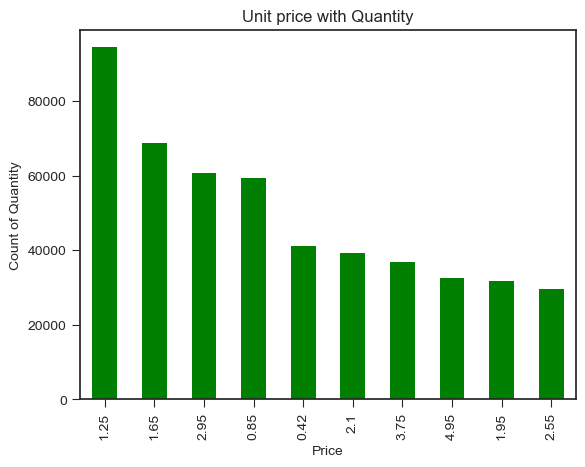

In [57]:
# Plot the bar graph
quantity_price.plot(kind ='bar', color = 'Green')
plt.xlabel('Price')
plt.ylabel('Count of Quantity')
plt.title('Unit price with Quantity')
plt.show()

### Most popular products

In [58]:
# Count of the customer ID for each Top 5 Description
customerid_count = df.groupby('Description')['Customer ID'].count().sort_values(ascending=False).reset_index().head(10)
customerid_count

Description  Customer ID
0  WHITE HANGING HEART T-LIGHT HOLDER         5016
1            REGENCY CAKESTAND 3 TIER         3336
2       ASSORTED COLOUR BIRD ORNAMENT         2691
3             JUMBO BAG RED RETROSPOT         2640
4                       PARTY BUNTING         2099
5             LUNCH BAG  BLACK SKULL.         2044
6        REX CASH+CARRY JUMBO SHOPPER         1950
7          LUNCH BAG SPACEBOY DESIGN          1890
8      STRAWBERRY CERAMIC TRINKET BOX         1859
9            HOME BUILDING BLOCK WORD         1852

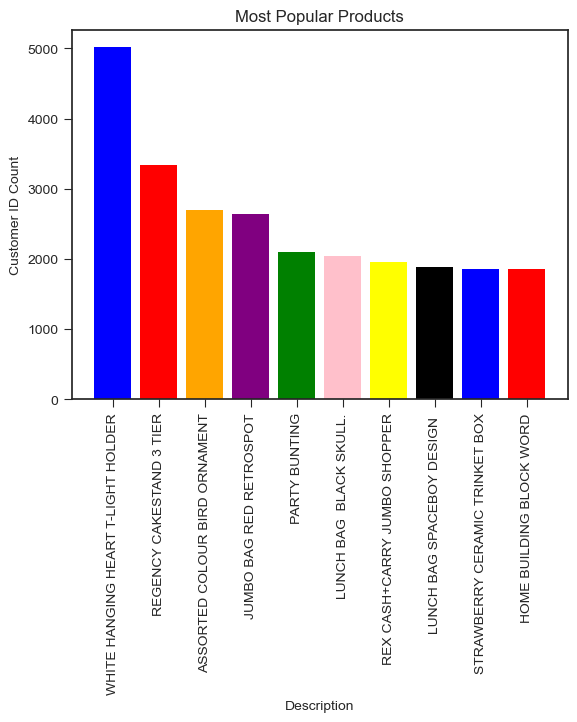

In [59]:
# Plot the bar graph
colors = ['Blue', 'Red', 'Orange', 'Purple', 'Green', 'Pink', 'Yellow', 'Black']
plt.bar(customerid_count['Description'], customerid_count['Customer ID'], color = colors)
plt.xlabel('Description')
plt.ylabel('Customer ID Count')
plt.title('Most Popular Products')
plt.xticks(rotation=90)
plt.show()

### Top 10 Customers by Revenue

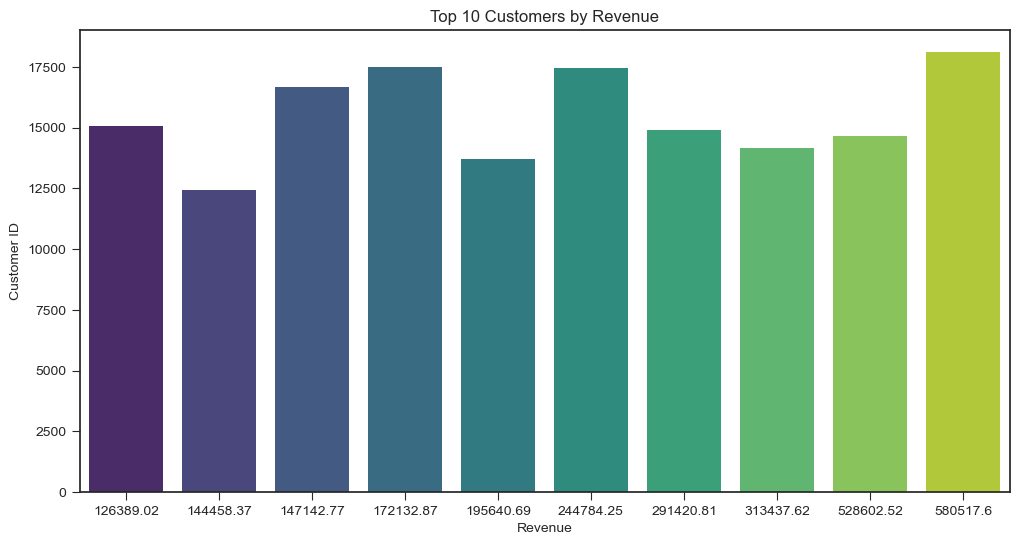

In [60]:
top_customers_revenue = df.groupby('Customer ID')['Revenue'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers_revenue.values, y=top_customers_revenue.index, palette='viridis')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Customer ID')
plt.show()

### Best-selling Products

In [61]:
# Count of the Quantity for each Top 10 Description
quantity_count = df.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index().head(10)
quantity_count

Description  Quantity
0  WHITE HANGING HEART T-LIGHT HOLDER      5016
1            REGENCY CAKESTAND 3 TIER      3336
2       ASSORTED COLOUR BIRD ORNAMENT      2691
3             JUMBO BAG RED RETROSPOT      2640
4                       PARTY BUNTING      2099
5             LUNCH BAG  BLACK SKULL.      2044
6        REX CASH+CARRY JUMBO SHOPPER      1950
7          LUNCH BAG SPACEBOY DESIGN       1890
8      STRAWBERRY CERAMIC TRINKET BOX      1859
9            HOME BUILDING BLOCK WORD      1852

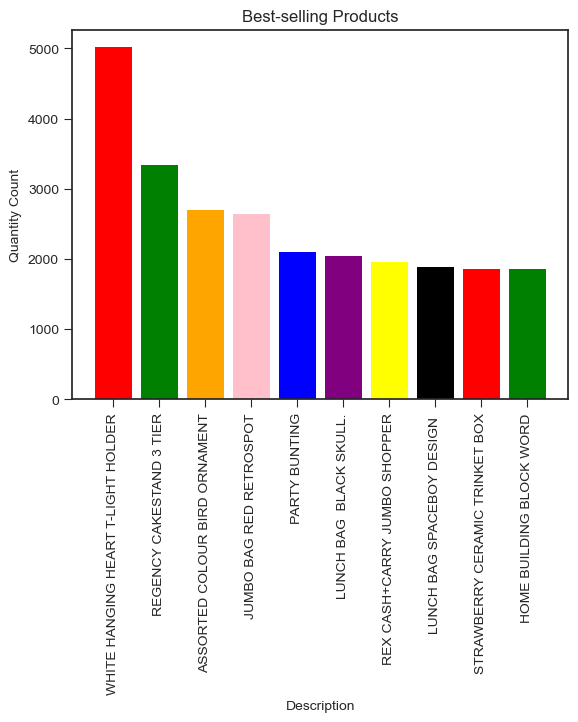

In [62]:
# Plot the bar graph
colors = ['Red', 'Green', 'Orange', 'Pink', 'Blue', 'Purple', 'Yellow', 'Black']
plt.bar(quantity_count['Description'], quantity_count['Quantity'], color = colors)
plt.xlabel('Description')
plt.ylabel('Quantity Count')
plt.title('Best-selling Products')
plt.xticks(rotation=90)
plt.show()

### Correlations

In [63]:
correlation = df[['Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Revenue', 'InvoiceYear', 'InvoiceMonth']].corr()
correlation

/var/folders/9t/jwr0675520x7pzpgdly3cs3c0000gn/T/ipykernel_46814/2208736040.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df[['Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Revenue', 'InvoiceYear', 'InvoiceMonth']].corr()


Quantity     Price  Customer ID   Revenue  InvoiceYear  \
Quantity      1.000000 -0.006207    -0.011704  0.702457    -0.002758   
Price        -0.006207  1.000000    -0.007504  0.249948    -0.002574   
Customer ID  -0.011704 -0.007504     1.000000 -0.010949    -0.029651   
Revenue       0.702457  0.249948    -0.010949  1.000000     0.000538   
InvoiceYear  -0.002758 -0.002574    -0.029651  0.000538     1.000000   
InvoiceMonth -0.009556 -0.004741     0.029549 -0.007762    -0.122420   

              InvoiceMonth  
Quantity         -0.009556  
Price            -0.004741  
Customer ID       0.029549  
Revenue          -0.007762  
InvoiceYear      -0.122420  
InvoiceMonth      1.000000

<Axes: >

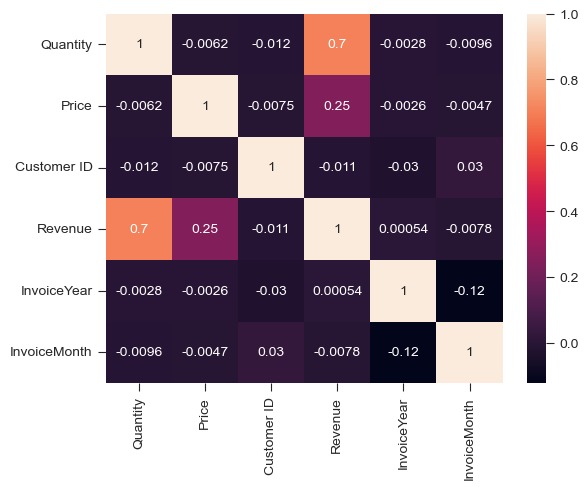

In [64]:
sns.heatmap(correlation, annot = True)

## Modifying the Dataframe

We need to identify only those columns which are important to us, namely, 'InvoiceDate' and 'Revenue'. Hence, we drop all other columns.

In [65]:
# Convert datetime column to datetime dtype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Change format of datetime column
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [66]:
df = df.groupby('InvoiceDate')['Revenue'].sum().reset_index()
df

InvoiceDate   Revenue
0    2009-12-01  43894.87
1    2009-12-02  52762.06
2    2009-12-03  67413.62
3    2009-12-04  33913.81
4    2009-12-05   9803.05
..          ...       ...
598  2011-12-04  20232.00
599  2011-12-05  58081.09
600  2011-12-06  45989.66
601  2011-12-07  69230.60
602  2011-12-08  50395.96

[603 rows x 2 columns]

# Time Series Analysis

#### Imports

In [67]:
import warnings
warnings.filterwarnings('ignore') 

In [68]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acovf
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
from scipy import signal
from scipy.fft import fft, ifft
from matplotlib.ticker import AutoMinorLocator
import math
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

## Time Series Plot, Autocorrelation & PSD

### by Date

In [69]:
df

InvoiceDate   Revenue
0    2009-12-01  43894.87
1    2009-12-02  52762.06
2    2009-12-03  67413.62
3    2009-12-04  33913.81
4    2009-12-05   9803.05
..          ...       ...
598  2011-12-04  20232.00
599  2011-12-05  58081.09
600  2011-12-06  45989.66
601  2011-12-07  69230.60
602  2011-12-08  50395.96

[603 rows x 2 columns]

In [70]:
# Grouping by InvoiceDate, then summing the Revenue
# data1 = df.groupby(['InvoiceDate'])['Revenue'].sum().reset_index()
data1 = df
data1.shape
# len(data1['InvoiceDate'].unique())

(603, 2)

<Figure size 1000x700 with 0 Axes>

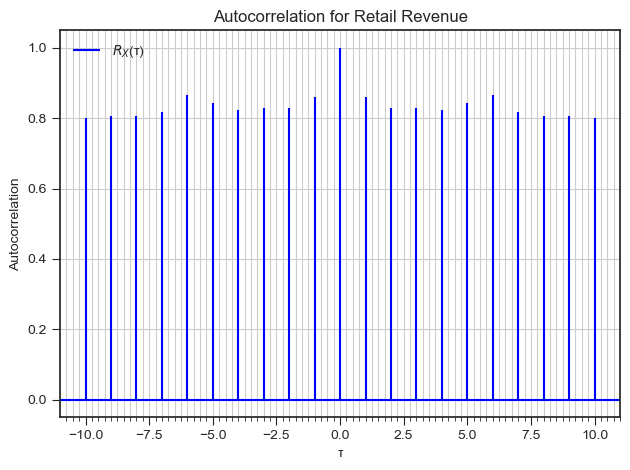

<Figure size 1000x700 with 0 Axes>

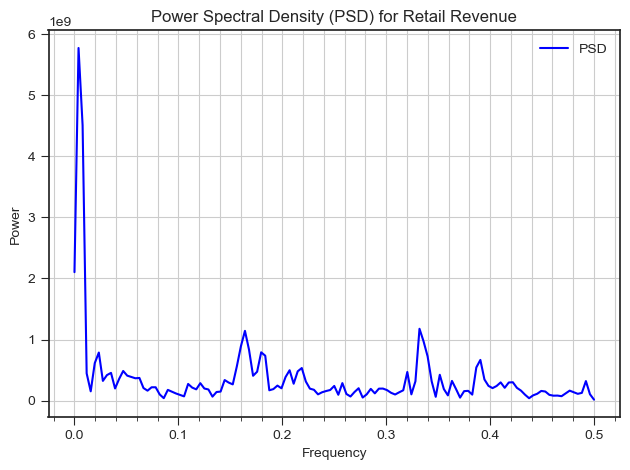

In [71]:
# Plotting Time Series 
# plt.plot(data1, color='blue')
# plt.ylabel('Revenue')
# plt.xlabel('Time')
# plt.legend(['Retail Revenue Time Series'])
# plt.grid(True)
# plt.show()

# Autocorrelation 
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.acorr(data1['Revenue'].values, color='blue')
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['$R_X$(τ)'], loc='upper left')
plt.xlabel('τ')
plt.ylabel('Autocorrelation')
ax.grid(True, which='both')
plt.title('Autocorrelation for Retail Revenue')
plt.tight_layout()
plt.show()

# Power Spectral Density (PSD) for WholeFood
freqs, psd = signal.welch(data1['Revenue'].values)
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.plot(freqs, psd, color='blue')
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['PSD'])
plt.xlabel('Frequency')
plt.ylabel('Power')
ax.grid(True, which='both')
plt.title('Power Spectral Density (PSD) for Retail Revenue')
plt.tight_layout()
plt.show()

## Convolution(5), MA(5), Butterworth Filter in Low Pass

### by Date

In [72]:
# Grouping by InvoiceDate, then summing the Revenue
# data1 = df.groupby(['InvoiceDate'])['Revenue'].sum().reset_index()
data1 = df

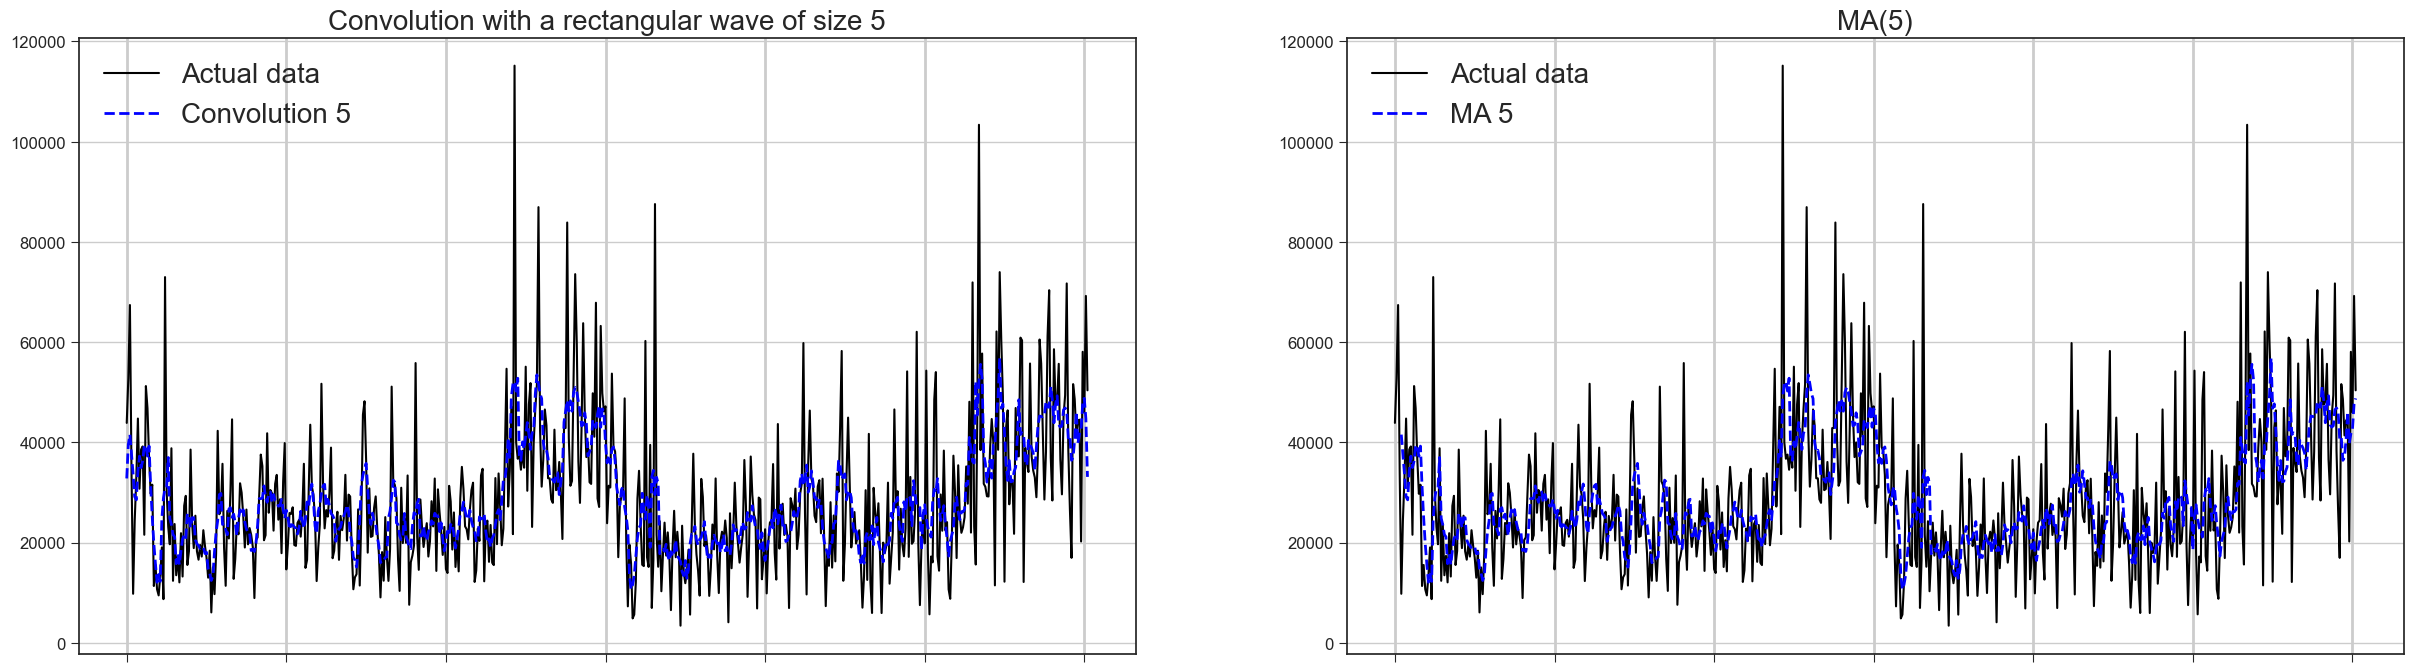

In [73]:
# for window size 5
### Convolution and MA
t = np.arange(0, data1.shape[0])
s1 = data1.Revenue.values
# Convolution
filtered = signal.convolve(s1, [1/5,1/5,1/5,1/5,1/5], mode='same')
# MA
x = pd.DataFrame(s1)
x = np.concatenate( x.rolling(5).mean().values.tolist(), axis=0 )
fig = plt.figure(figsize=(30, 8))

ax1 = plt.subplot(121)
plt.plot(t, s1,'k')
plt.plot(t, filtered,'--b',linewidth=2)
plt.title("Convolution with a rectangular wave of size 5", fontsize=20)
plt.tick_params('x', labelbottom=False)
plt.yticks(fontsize=12)
ax1.xaxis.grid(linewidth=2)
ax1.yaxis.grid(linewidth=1)
ax1.legend(['Actual data','Convolution 5'],fontsize=20)

ax2 = plt.subplot(122)
plt.plot(t, s1,'k')
plt.plot(t, x,'--b',linewidth=2)
plt.title("MA(5)", fontsize=20)
plt.tick_params('x', labelbottom=False)
plt.yticks(fontsize=12)
ax2.xaxis.grid(linewidth=2)
ax2.yaxis.grid(linewidth=1)
ax2.legend(['Actual data','MA 5'],fontsize=20)
plt.grid(True)
plt.show()

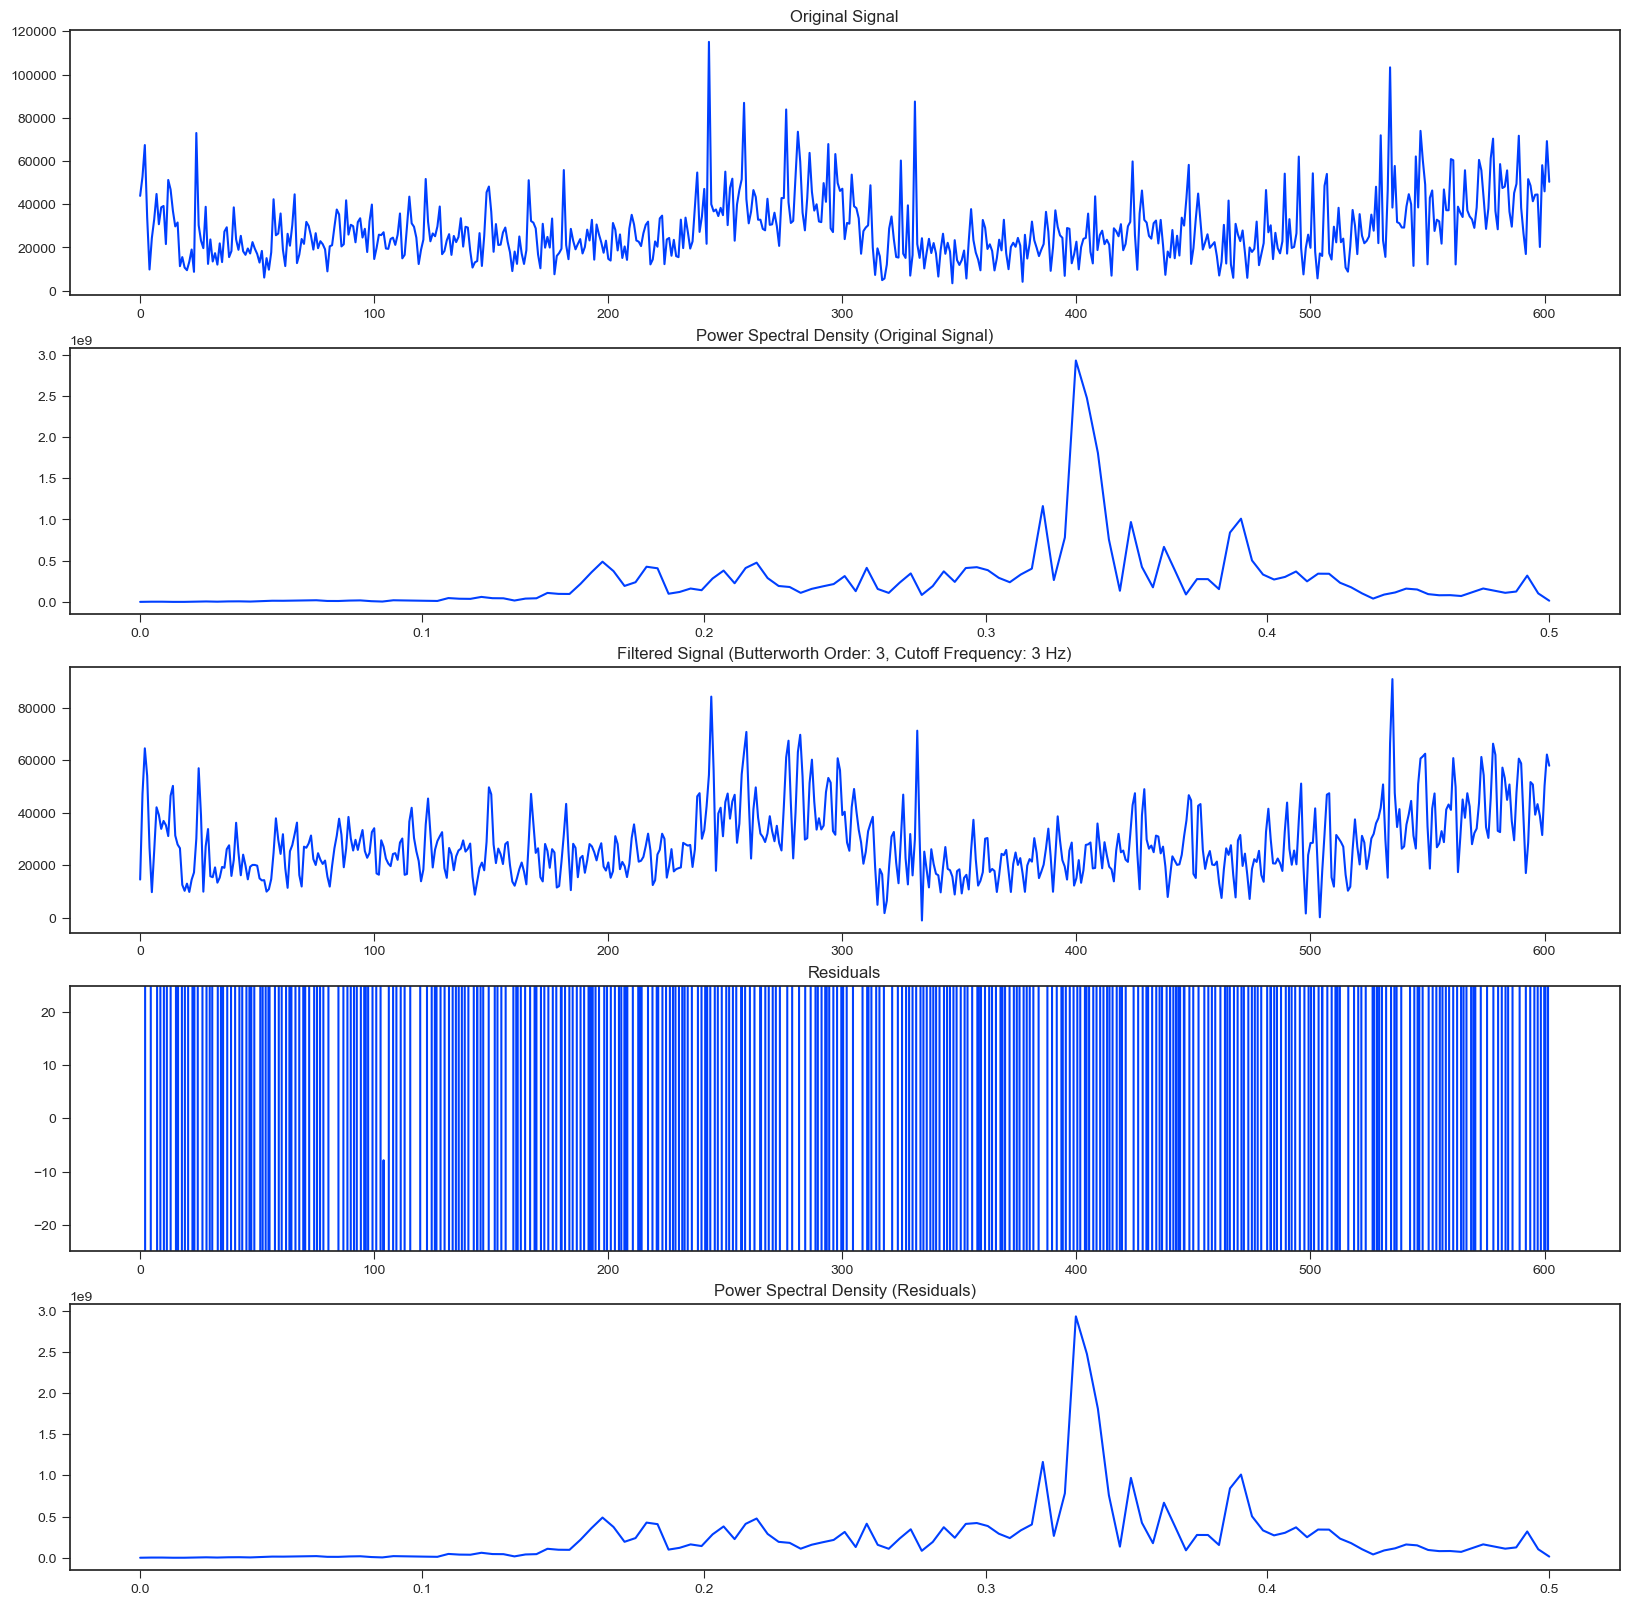

In [74]:
# Butterworth Filter in Low Pass

t = np.arange(0, data1.shape[0])
sig = data1.Revenue.values
RMSE = 10000000000
fss=0
order=0

for i in np.arange(3,20):
    for j in np.arange(i,30):
        sos = signal.butter(i, 1, 'lowpass', fs=j, output='sos')
        filtered = signal.sosfilt(sos, sig)
        freqs, psd = signal.welch(sig)
        freqs, psd = signal.welch(sig-filtered)
        MSE=100000000000000000000
        MSE = np.square(sig-filtered).mean() 
        if(RMSE > math.sqrt(MSE)):
            RMSE = math.sqrt(MSE)
            order = i
            fss = j
            fig = plt.figure(figsize=(20, 20))
            ax1 = plt.subplot(511)
            plt.plot(t, sig)
            plt.title('Original Signal')
            ax2 = plt.subplot(512)
            plt.plot(freqs, psd)
            plt.title('Power Spectral Density (Original Signal)')
            ax3 = plt.subplot(513)
            plt.plot(t, filtered)
            plt.title('Filtered Signal (Butterworth Order: {}, Cutoff Frequency: {} Hz)'.format(order, fss))
            ax4 = plt.subplot(514)
            plt.plot(t,sig-filtered)
            plt.ylim(-25,25)
            plt.title('Residuals')
            ax5 = plt.subplot(515)
            plt.plot(freqs, psd)
            plt.title('Power Spectral Density (Residuals)')
            plt.show()

# Testing Models

### Removing Outliers from Data

**Insight**: We are removing the outliers from the data using the Winsorized Mean (WM).

In [75]:
# Calculate Q1, Q3, and IQR for 'Revenue'
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [76]:
# Replace outliers with NaN
df['Revenue_Winsorized'] = df['Revenue']
df.loc[df['Revenue'] < lower_bound, 'Revenue_Winsorized'] = np.nan
df.loc[df['Revenue'] > upper_bound, 'Revenue_Winsorized'] = np.nan

# Calculate winsorized mean (mean without outliers)
winsorized_mean = df['Revenue_Winsorized'].mean()

# Replace NaNs (outliers) with the winsorized mean
df['Revenue_Winsorized'].fillna(winsorized_mean, inplace=True)

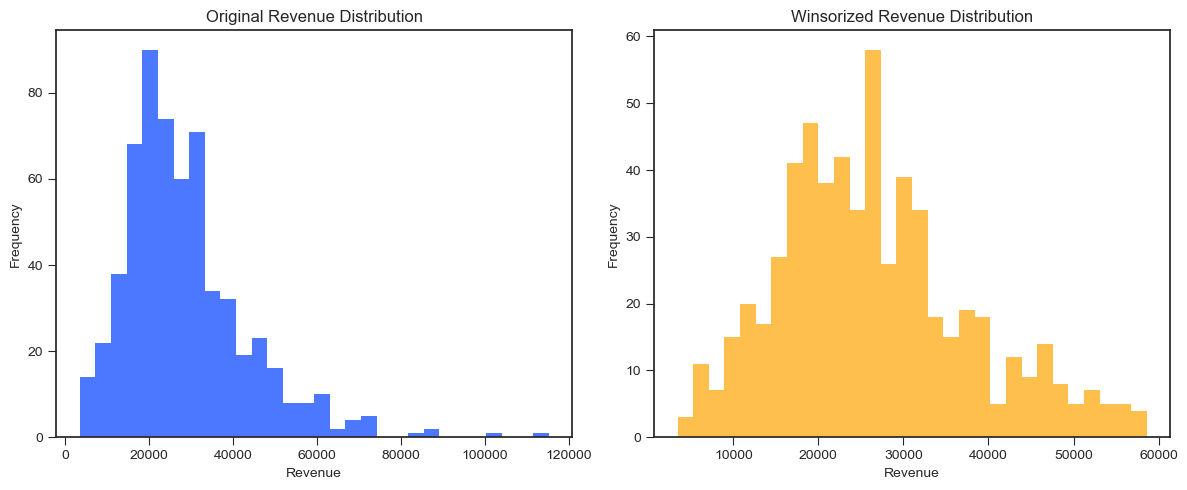

In [77]:
import matplotlib.pyplot as plt

# Plot original and winsorized Revenue distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Revenue'], bins=30, alpha=0.7, label='Original')
plt.title('Original Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Revenue_Winsorized'], bins=30, alpha=0.7, label='Winsorized', color='orange')
plt.title('Winsorized Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [78]:
df['Revenue'] = df['Revenue_Winsorized']

In [79]:
df.drop(columns=['Revenue_Winsorized'], inplace=True)

In [80]:
df

InvoiceDate      Revenue
0    2009-12-01  43894.87000
1    2009-12-02  52762.06000
2    2009-12-03  26585.96504
3    2009-12-04  33913.81000
4    2009-12-05   9803.05000
..          ...          ...
598  2011-12-04  20232.00000
599  2011-12-05  58081.09000
600  2011-12-06  45989.66000
601  2011-12-07  26585.96504
602  2011-12-08  50395.96000

[603 rows x 2 columns]

## Checking Stationarity

In [81]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set 'InvoiceDate' as the index
df.set_index('InvoiceDate', inplace=True)

# Perform the Augmented Dickey-Fuller test on 'Revenue'
result = adfuller(df['Revenue'])

# Display the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.044728
p-value: 0.267312
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


### Insight: 
We need to STATIONARIZE the data, we do this by DIFFERENCING.

In [82]:
# Assuming df['Revenue'] is your time series column
df['Revenue_diff'] = df['Revenue'].diff()

# Drop the NaN values created by differencing
df.dropna(subset=['Revenue_diff'], inplace=True)

In [83]:
from statsmodels.tsa.stattools import adfuller

# Example using the differenced data
adf_result = adfuller(df['Revenue_diff'].dropna())  # Ensure to drop any NaN values

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.037123
p-value: 0.000000
	1%: -3.442
	5%: -2.866
	10%: -2.569


### Checking for any NaN or Infinity values in dataframe

In [84]:
# Replace inf/-inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove any rows with NaN values
df.dropna(inplace=True)

In [85]:
# Check again for NaN values
print("NaN values after cleaning:")
print(df.isna().sum())

# Check again for inf values
print("\nInf values after cleaning:")
print(df.replace([np.inf, -np.inf], np.nan).isna().sum())

NaN values after cleaning:
Revenue         0
Revenue_diff    0
dtype: int64

Inf values after cleaning:
Revenue         0
Revenue_diff    0
dtype: int64


In [86]:
df

Revenue  Revenue_diff
InvoiceDate                           
2009-12-02   52762.06000    8867.19000
2009-12-03   26585.96504  -26176.09496
2009-12-04   33913.81000    7327.84496
2009-12-05    9803.05000  -24110.76000
2009-12-06   24390.10000   14587.05000
...                  ...           ...
2011-12-04   20232.00000  -24294.10000
2011-12-05   58081.09000   37849.09000
2011-12-06   45989.66000  -12091.43000
2011-12-07   26585.96504  -19403.69496
2011-12-08   50395.96000   23809.99496

[602 rows x 2 columns]

In [87]:
# Assuming 'InvoiceDate' is currently the index column
df.reset_index(inplace=True)

In [88]:
df

InvoiceDate      Revenue  Revenue_diff
0    2009-12-02  52762.06000    8867.19000
1    2009-12-03  26585.96504  -26176.09496
2    2009-12-04  33913.81000    7327.84496
3    2009-12-05   9803.05000  -24110.76000
4    2009-12-06  24390.10000   14587.05000
..          ...          ...           ...
597  2011-12-04  20232.00000  -24294.10000
598  2011-12-05  58081.09000   37849.09000
599  2011-12-06  45989.66000  -12091.43000
600  2011-12-07  26585.96504  -19403.69496
601  2011-12-08  50395.96000   23809.99496

[602 rows x 3 columns]

### Training, Validation & Test Sets

**Insight**: Here we have divided the data into Train (70%), Validation (20%) and Test (10%). Furthermore, we have divided the Test portion into 4 equal parts and run the models on each part and reported the MAPE.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

train_size = int(0.7 * len(df))
val_size = int(0.2 * len(df))
test_size = len(df) - train_size - val_size

train_data = df[:train_size]
val_data = df[train_size:train_size+val_size]
test_data = df[train_size+val_size:]

In [90]:
# Calculate sizes for each part
part_size = len(test_data) // 4

# Split test data into four equal parts
test_parts = [test_data[i*part_size:(i+1)*part_size] for i in range(4)]

# Display the sizes of each part
for i, part in enumerate(test_parts):
    print(f"Size of part {i+1}: {len(part)}")

# Example usage of the parts
part1 = test_parts[0]
part2 = test_parts[1]
part3 = test_parts[2]
part4 = test_parts[3]

Size of part 1: 15
Size of part 2: 15
Size of part 3: 15
Size of part 4: 15


## Model: Holt-Winters Exponential Smoothing

Metrics for Part 1: MAPE = 31.91%, RMSE = 12512.94


/Users/saumkothari/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


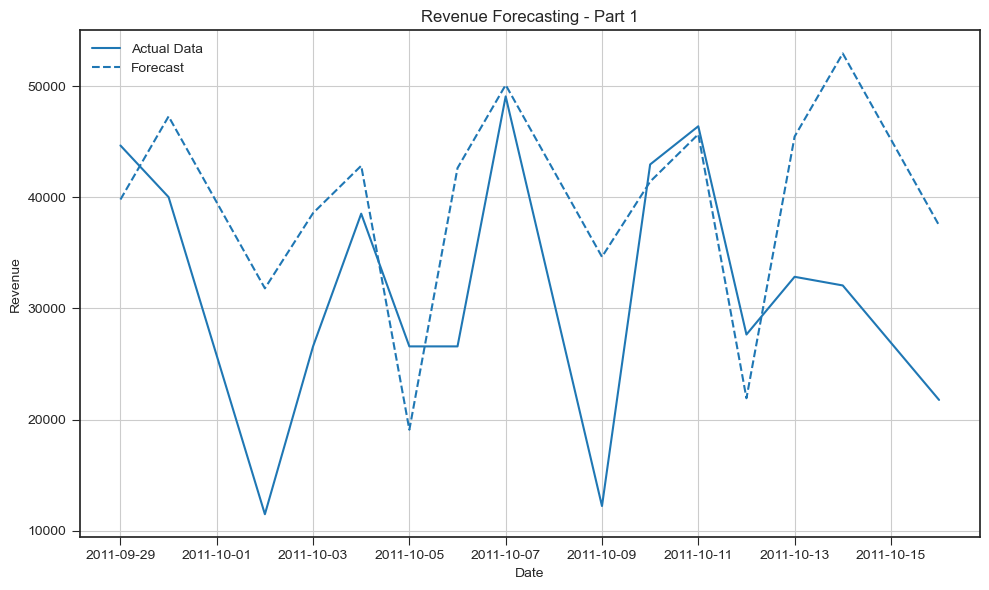

Metrics for Part 2: MAPE = 57.72%, RMSE = 23633.71


/Users/saumkothari/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


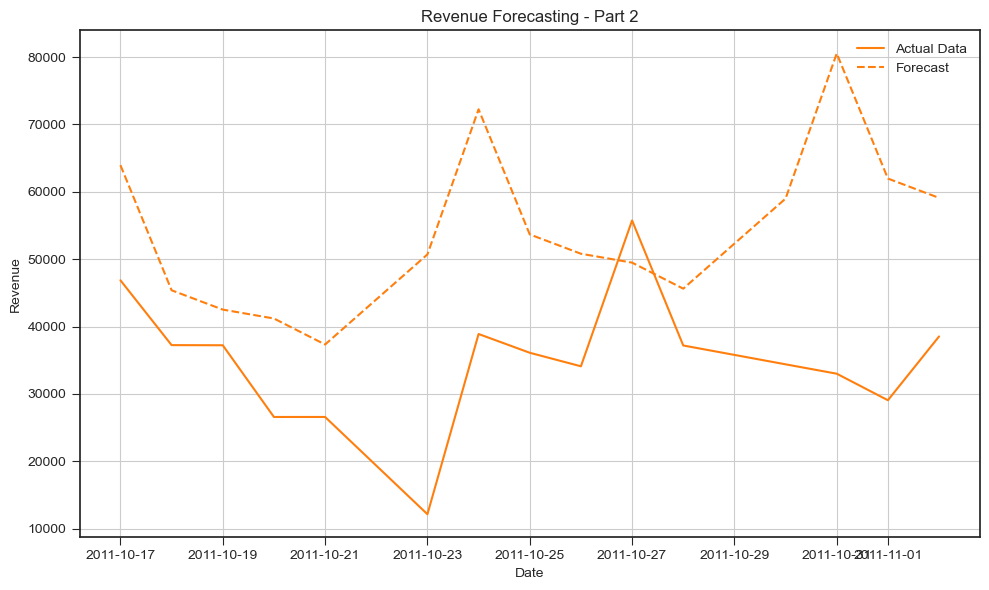

/Users/saumkothari/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Metrics for Part 3: MAPE = 47.08%, RMSE = 22613.08


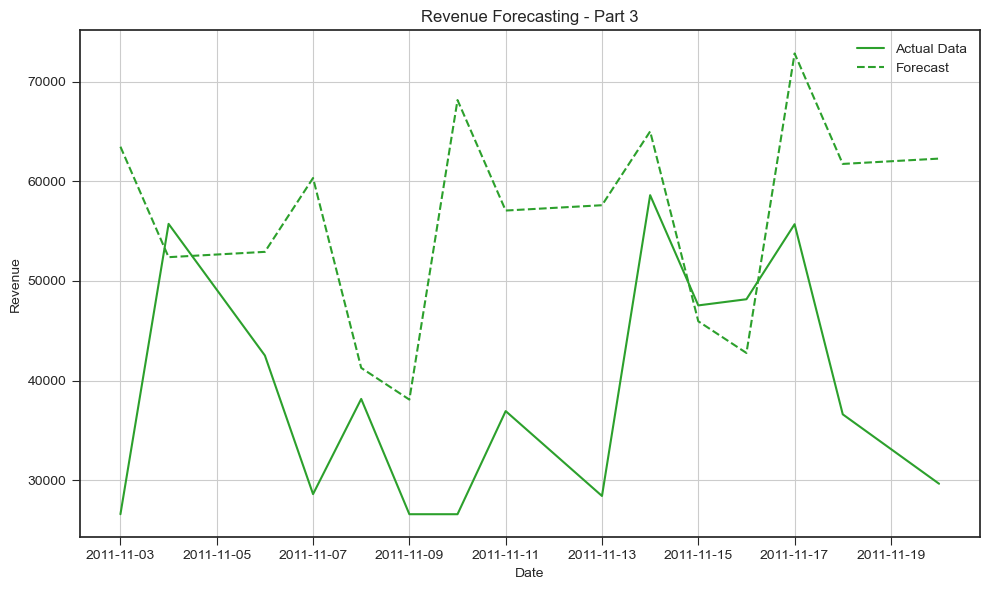

/Users/saumkothari/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Metrics for Part 4: MAPE = 30.08%, RMSE = 14104.88


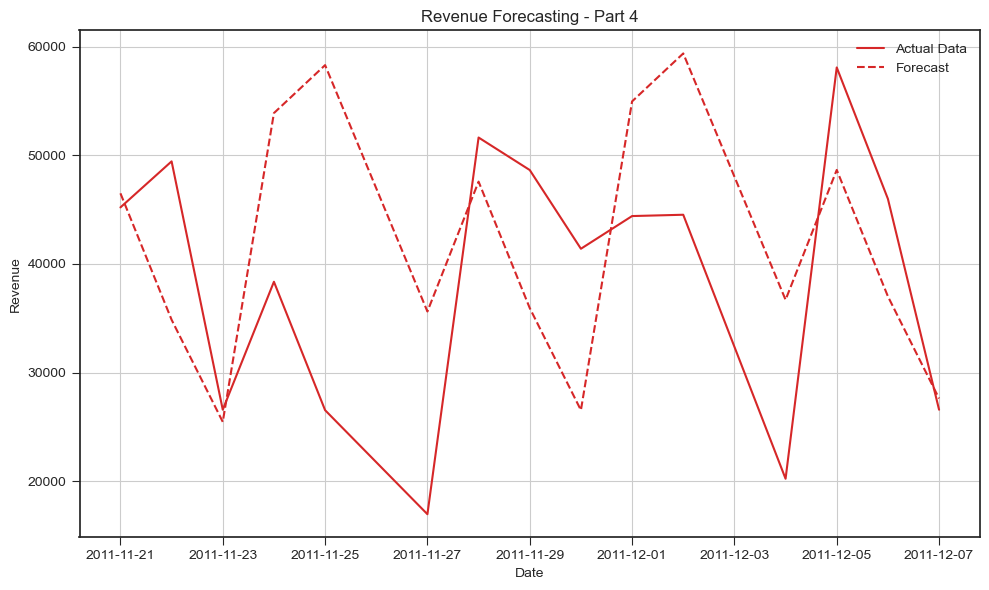

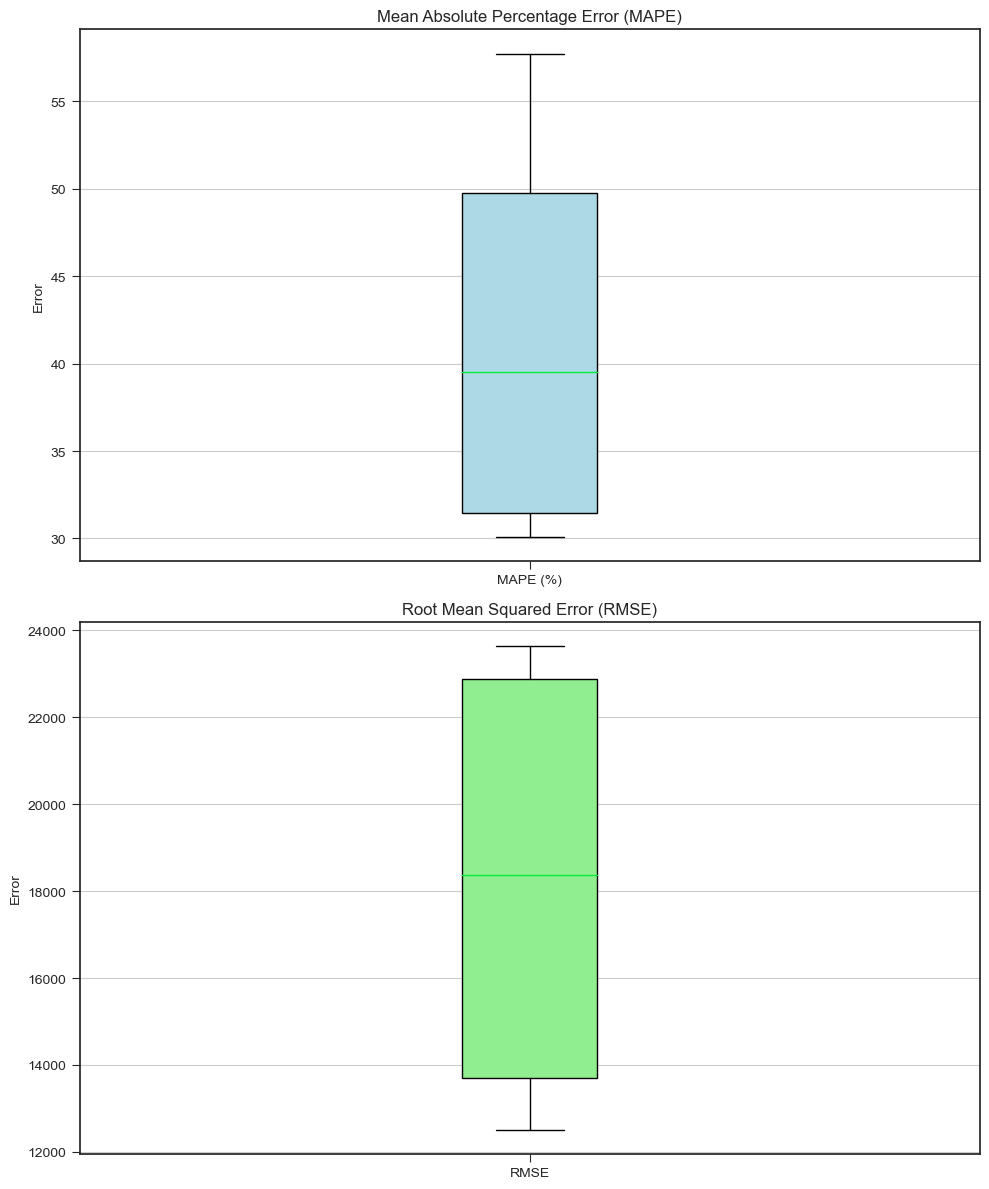

In [91]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define custom color scheme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Initialize lists to store MAPEs, RMSEs, and forecasted values
mape_list = []
rmse_list = []
forecast_list = []

for i, part in enumerate(test_parts):
    
    model = ExponentialSmoothing(part['Revenue'], trend='add', seasonal='add', seasonal_periods=6).fit()
    
    # Forecast for the current part
    forecast = model.forecast(len(part))
    forecast_list.append(forecast)

    # Step 6: Testing
    # Calculate MAPE and RMSE for the current part
    mape = mean_absolute_error(part['Revenue'], forecast) / np.mean(part['Revenue']) * 100
    mape_list.append(mape)
    
    rmse = np.sqrt(mean_squared_error(part['Revenue'], forecast))
    rmse_list.append(rmse)
    
    print(f"Metrics for Part {i+1}: MAPE = {mape:.2f}%, RMSE = {rmse:.2f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(part['InvoiceDate'], part['Revenue'], label='Actual Data', color=colors[i])
    plt.plot(part['InvoiceDate'], forecast, label='Forecast', linestyle='--', color=colors[i])
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(f'Revenue Forecasting - Part {i+1}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Box plot for MAPE
ax1.boxplot(mape_list, labels=['MAPE (%)'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax1.set_title('Mean Absolute Percentage Error (MAPE)')

# Box plot for RMSE
ax2.boxplot(rmse_list, labels=['RMSE'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax2.set_title('Root Mean Squared Error (RMSE)')

# Common labels
for ax in (ax1, ax2):
    ax.set_ylabel('Error')
    ax.grid(axis='y')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

Mean Absolute Error: 8930.520214785476
Testing Mean Absolute Error: 15066.94133746566


/Users/saumkothari/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


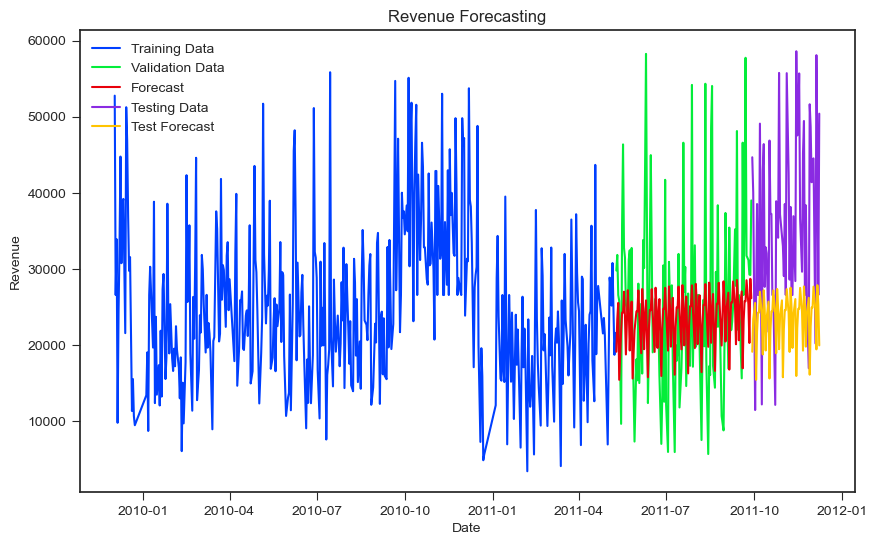

In [92]:
# Step 4: Time Series Modeling
# Example: Exponential Smoothing
model = ExponentialSmoothing(train_data['Revenue'], trend='add', seasonal='add', seasonal_periods=12).fit()

forecast = model.forecast(len(val_data))
mae = mean_absolute_error(val_data['Revenue'], forecast)
print("Mean Absolute Error:", mae)

# Step 6: Testing
test_forecast = model.forecast(len(test_data))
test_mae = mean_absolute_error(test_data['Revenue'], test_forecast)
print("Testing Mean Absolute Error:", test_mae)

# Optional: Visualization
plt.figure(figsize=(10, 6))
plt.plot(train_data['InvoiceDate'], train_data['Revenue'], label='Training Data')
plt.plot(val_data['InvoiceDate'], val_data['Revenue'], label='Validation Data')
plt.plot(val_data['InvoiceDate'], forecast, label='Forecast')
plt.plot(test_data['InvoiceDate'], test_data['Revenue'], label='Testing Data')
plt.plot(test_data['InvoiceDate'], test_forecast, label='Test Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Forecasting')
plt.show()

## Model: ARIMA

Mean Absolute Percentage Error for Part 1: 0.40%


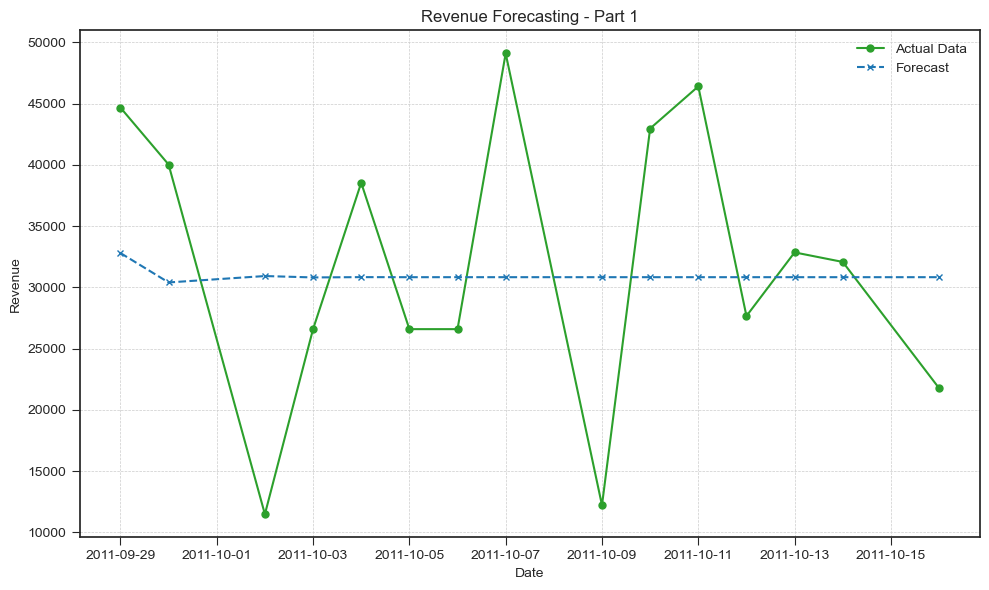

Mean Absolute Percentage Error for Part 2: 0.26%


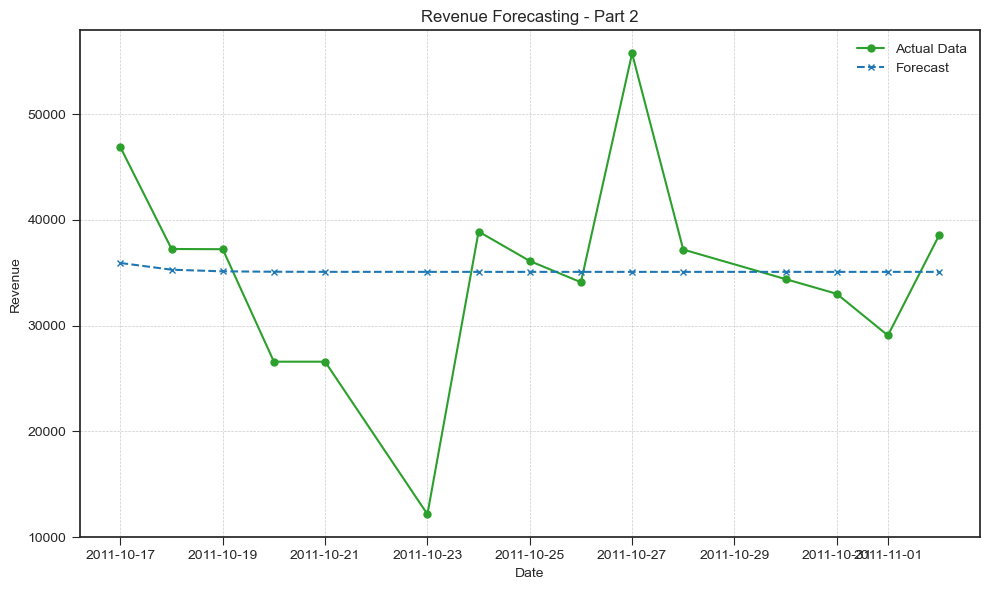

Mean Absolute Percentage Error for Part 3: 0.24%


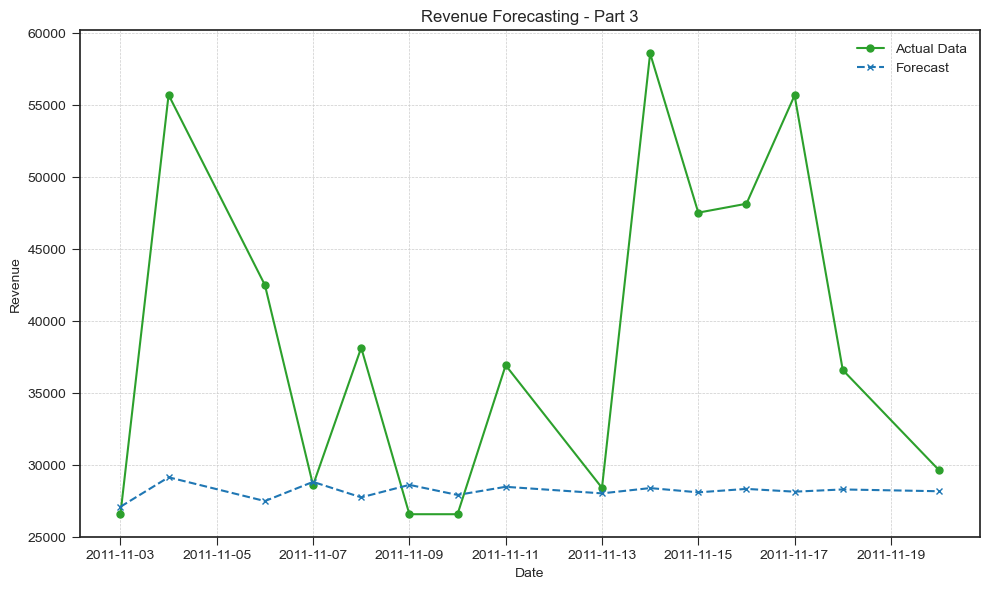

Mean Absolute Percentage Error for Part 4: 0.35%


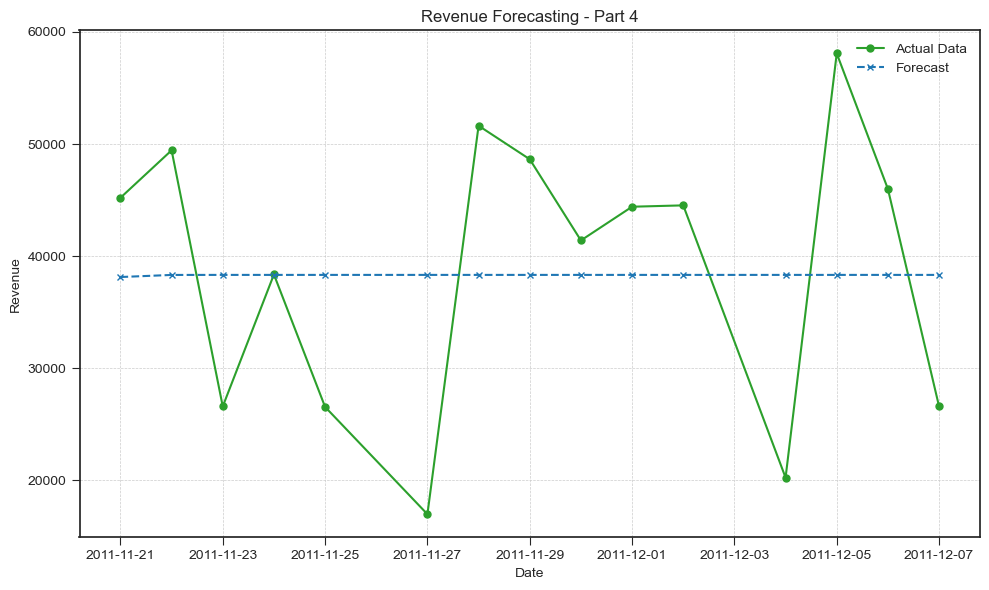

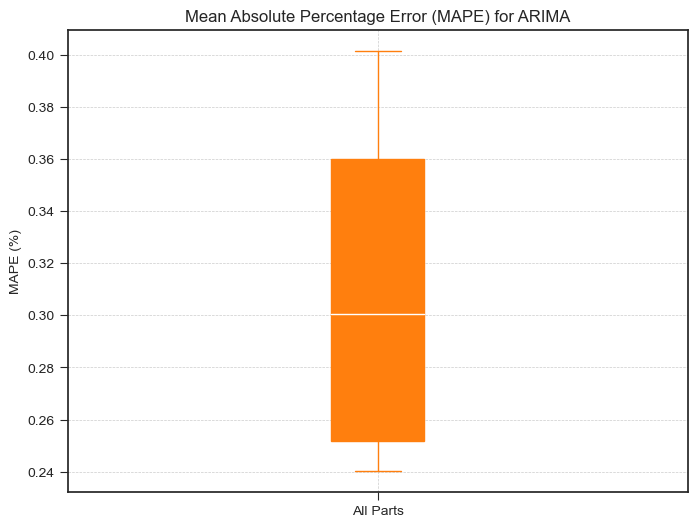

In [93]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store MAPEs and forecasted values
mape_list = []
forecast_list = []

# Define a visually appealing color scheme for the plots
actual_color = '#2ca02c'  # Green color for actual data
forecast_color = '#1f77b4'  # Blue color for forecast data

for i, part in enumerate(test_parts):
    # Step 4: Time Series Modeling
    model = ARIMA(part['Revenue'], order=(1,1,1)).fit()

    # Forecast for the current part
    forecast = model.forecast(len(part))
    forecast_list.append(forecast)

    # Step 6: Testing
    # Calculate MAPE for the current part
    mape = mean_absolute_percentage_error(part['Revenue'], forecast)
    mape_list.append(mape)
    print(f"Mean Absolute Percentage Error for Part {i+1}: {mape:.2f}%")

    # Optional: Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(part['InvoiceDate'], part['Revenue'], label='Actual Data', color=actual_color, marker='o', linestyle='-', markersize=5)
    plt.plot(part['InvoiceDate'], forecast, label='Forecast', color=forecast_color, marker='x', linestyle='--', markersize=5)
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(f'Revenue Forecasting - Part {i+1}')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Create a box plot of MAPEs for all parts with an enhanced color scheme
plt.figure(figsize=(8, 6))
plt.boxplot(mape_list, patch_artist=True, boxprops=dict(facecolor='#ff7f0e', color='#ff7f0e'), whiskerprops=dict(color='#ff7f0e'), capprops=dict(color='#ff7f0e'), medianprops=dict(color='white'))
plt.title('Mean Absolute Percentage Error (MAPE) for ARIMA')
plt.xticks([1], ['All Parts'])
plt.ylabel('MAPE (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## Model: SARIMAX

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61616D+00    |proj g|=  1.01380D+00

At iterate    5    f=  1.28427D+00    |proj g|=  1.96330D-02

At iterate   10    f=  1.28027D+00    |proj g|=  8.94739D-04

At iterate   15    f=  1.28026D+00    |proj g|=  1.80511D-03

At iterate   20    f=  1.28024D+00    |proj g|=  4.21015D-04


 This problem is unconstrained.



At iterate   25    f=  1.28024D+00    |proj g|=  2.24649D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   2.246D-05   1.280D+00
  F =   1.2802435788775250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Mean Absolute Percentage Error for Part 1: 0.46%


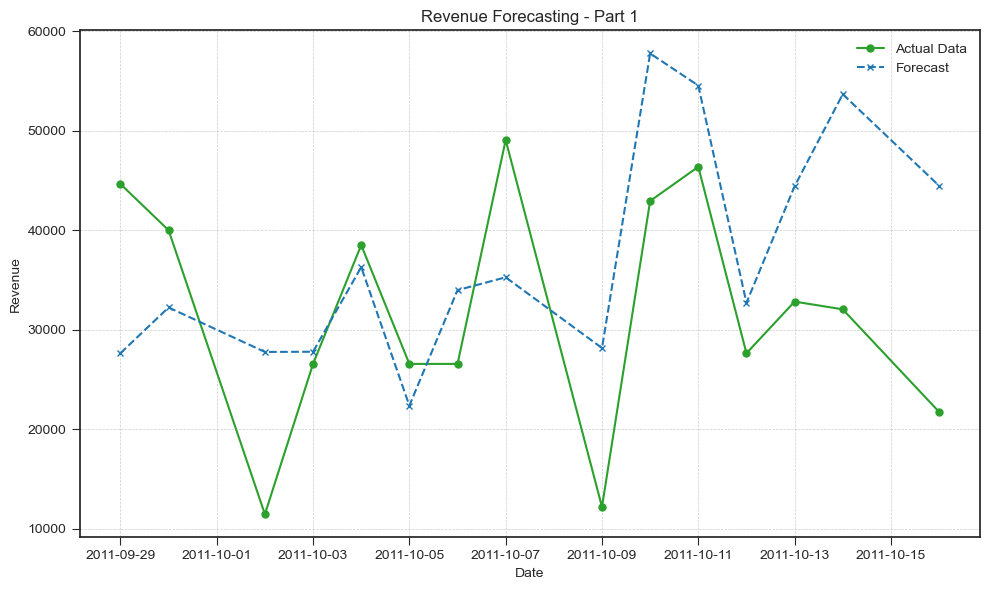

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79268D+00    |proj g|=  2.98663D+00

At iterate    5    f=  1.24920D+00    |proj g|=  4.92941D-01

At iterate   10    f=  1.18378D+00    |proj g|=  1.71568D-01

At iterate   15    f=  1.16725D+00    |proj g|=  3.35435D-02

At iterate   20    f=  1.16338D+00    |proj g|=  1.03458D-03

At iterate   25    f=  1.16154D+00    |proj g|=  3.10103D-02


 This problem is unconstrained.



At iterate   30    f=  1.16125D+00    |proj g|=  1.28421D-03

At iterate   35    f=  1.16114D+00    |proj g|=  6.33797D-04

At iterate   40    f=  1.16113D+00    |proj g|=  2.05343D-03

At iterate   45    f=  1.16113D+00    |proj g|=  1.78444D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     61      1     0     0   9.440D-06   1.161D+00
  F =   1.1611256898173574     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Mean Absolute Percentage Error for Part 2: 0.83%


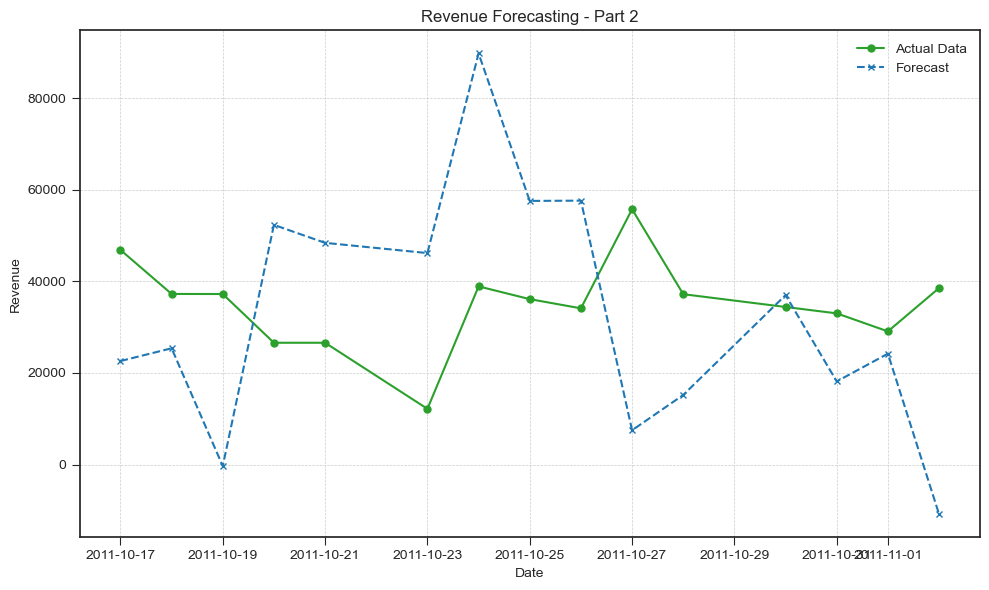

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61648D+00    |proj g|=  2.00174D-01

At iterate    5    f=  1.49326D+00    |proj g|=  1.94839D-02

At iterate   10    f=  1.48687D+00    |proj g|=  1.43238D-03

At iterate   15    f=  1.48521D+00    |proj g|=  8.38743D-04

At iterate   20    f=  1.48501D+00    |proj g|=  1.46574D-04

At iterate   25    f=  1.48499D+00    |proj g|=  2.67318D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     28      1     0     0   

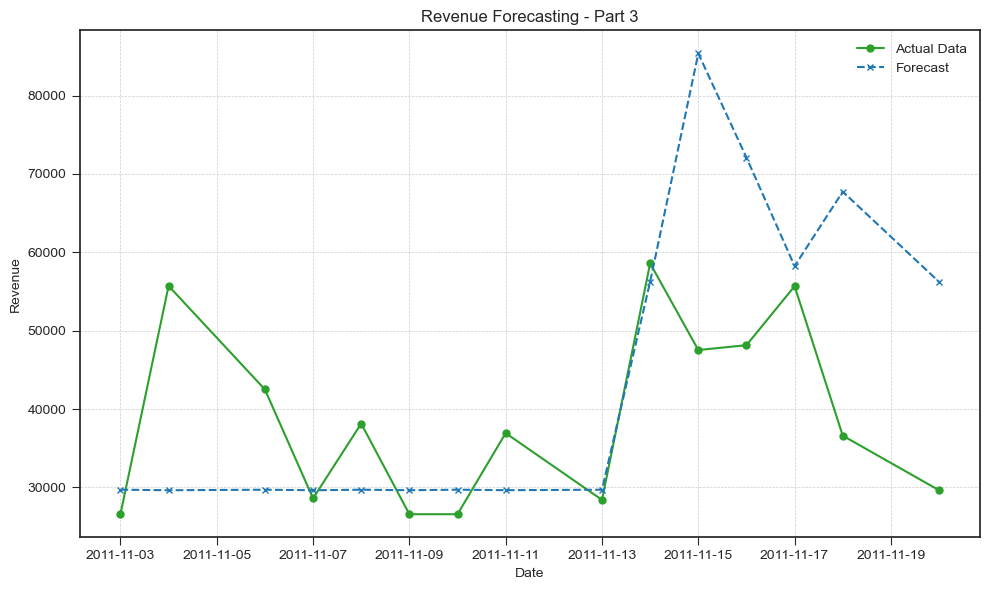

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46445D+00    |proj g|=  1.49065D-01

At iterate    5    f=  1.43983D+00    |proj g|=  3.65841D-02

At iterate   10    f=  1.41550D+00    |proj g|=  2.41938D-02

At iterate   15    f=  1.40582D+00    |proj g|=  8.83002D-03

At iterate   20    f=  1.40072D+00    |proj g|=  5.56973D-04

At iterate   25    f=  1.39909D+00    |proj g|=  4.68882D-04

At iterate   30    f=  1.39891D+00    |proj g|=  2.30614D-03

At iterate   35    f=  1.39859D+00    |proj g|=  3.53262D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     63      1     0     0   3.337D-04   1.398D+00
  F =   1.3984934986046242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Mean Absolute Percentage Error for Part 4: 0.45%



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


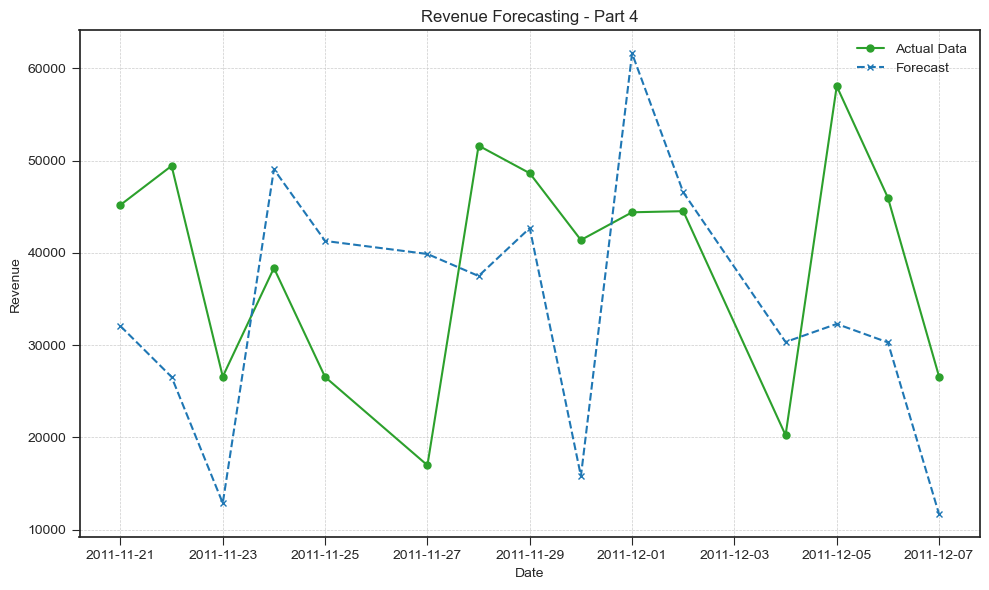

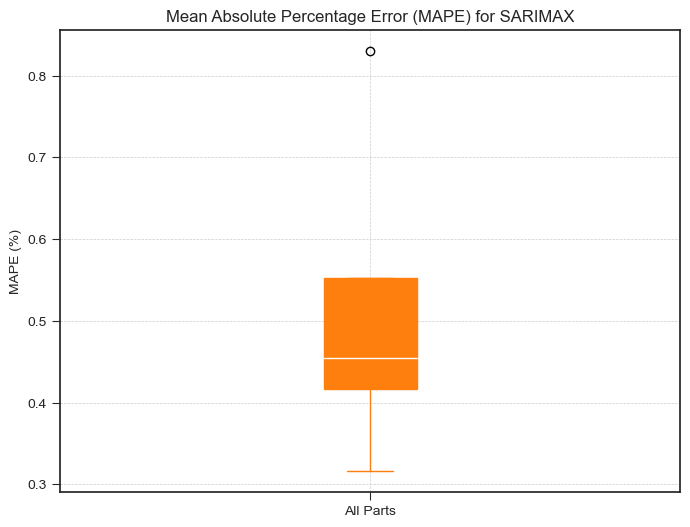

In [94]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store MAPEs and forecasted values
mape_list = []
forecast_list = []

# Define a visually appealing color scheme for the plots
actual_color = '#2ca02c'  # Green color for actual data
forecast_color = '#1f77b4'  # Blue color for forecast data

for i, part in enumerate(test_parts):
    # Step 4: Time Series Modeling
    model = sm.tsa.statespace.SARIMAX(part['Revenue'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

    # Forecast for the current part
    forecast = model.forecast(len(part))
    forecast_list.append(forecast)

    # Step 6: Testing
    # Calculate MAPE for the current part
    mape = mean_absolute_percentage_error(part['Revenue'], forecast)
    mape_list.append(mape)
    print(f"Mean Absolute Percentage Error for Part {i+1}: {mape:.2f}%")

    #Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(part['InvoiceDate'], part['Revenue'], label='Actual Data', color=actual_color, marker='o', linestyle='-', markersize=5)
    plt.plot(part['InvoiceDate'], forecast, label='Forecast', color=forecast_color, marker='x', linestyle='--', markersize=5)
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(f'Revenue Forecasting - Part {i+1}')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Create a box plot of MAPEs for all parts with an enhanced color scheme
plt.figure(figsize=(8, 6))
plt.boxplot(mape_list, patch_artist=True, boxprops=dict(facecolor='#ff7f0e', color='#ff7f0e'), whiskerprops=dict(color='#ff7f0e'), capprops=dict(color='#ff7f0e'), medianprops=dict(color='white'))
plt.title('Mean Absolute Percentage Error (MAPE) for SARIMAX')
plt.xticks([1], ['All Parts'])
plt.ylabel('MAPE (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [95]:
# defining the model using revenue column
model = ARIMA(df['Revenue'], order=(1,1,1))
model_fit = model.fit()

# check summary of the model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  602
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6394.158
Date:                Fri, 22 Mar 2024   AIC                          12794.315
Time:                        21:09:55   BIC                          12807.511
Sample:                             0   HQIC                         12799.452
                                - 602                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1017      0.053      1.925      0.054      -0.002       0.205
ma.L1         -0.9144      0.023    -39.963      0.000      -0.959      -0.870
sigma2      1.225e+08   5.04e-11   2.43e+18      0.000    1.22e+08    1.22e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                32.09
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.51
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.07e+33. Standard errors may be unstable.
"""

## Model: Random Forest Regressor

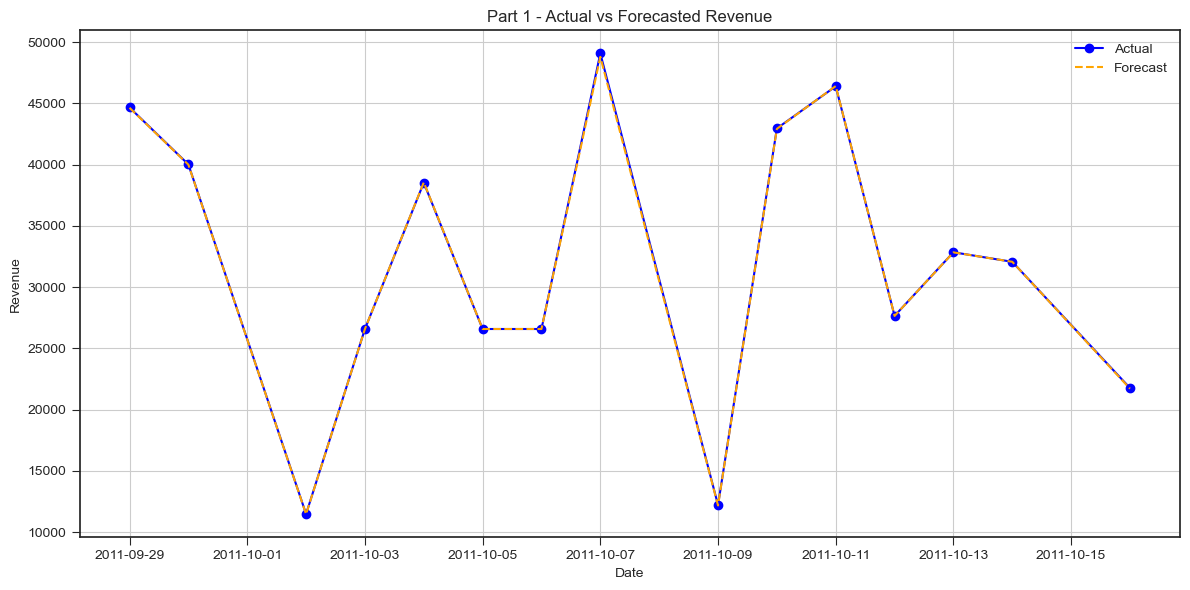

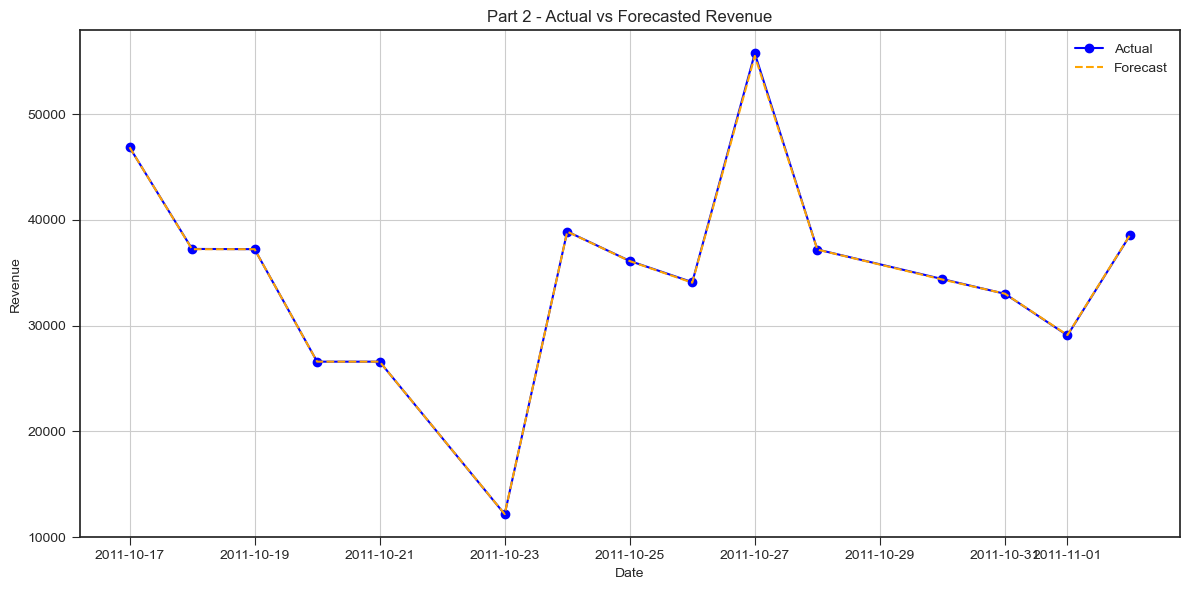

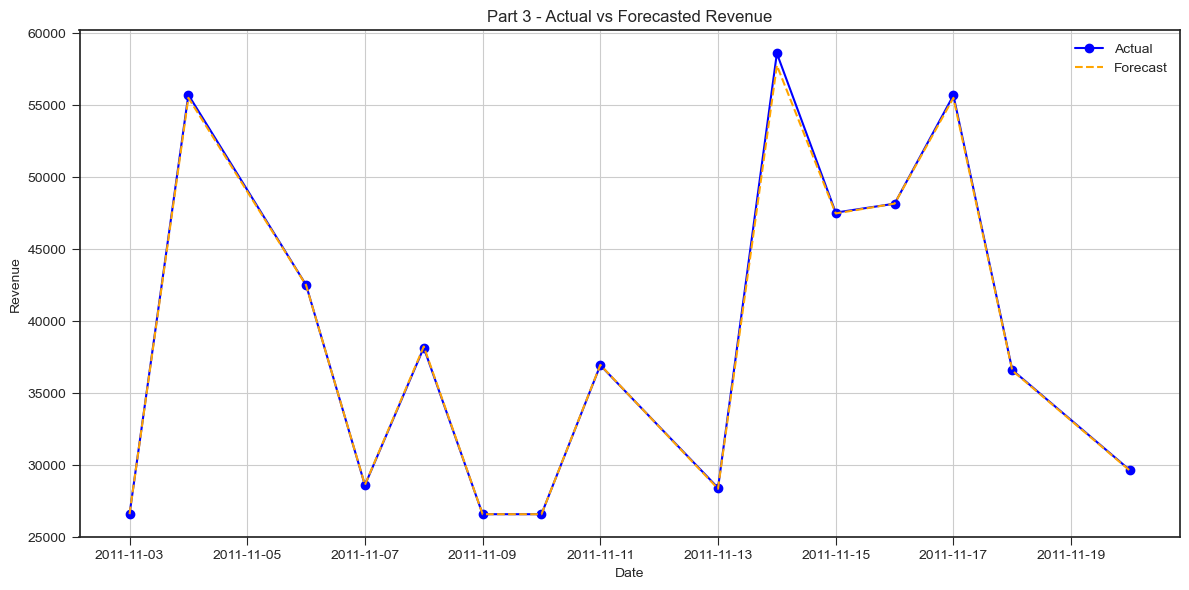

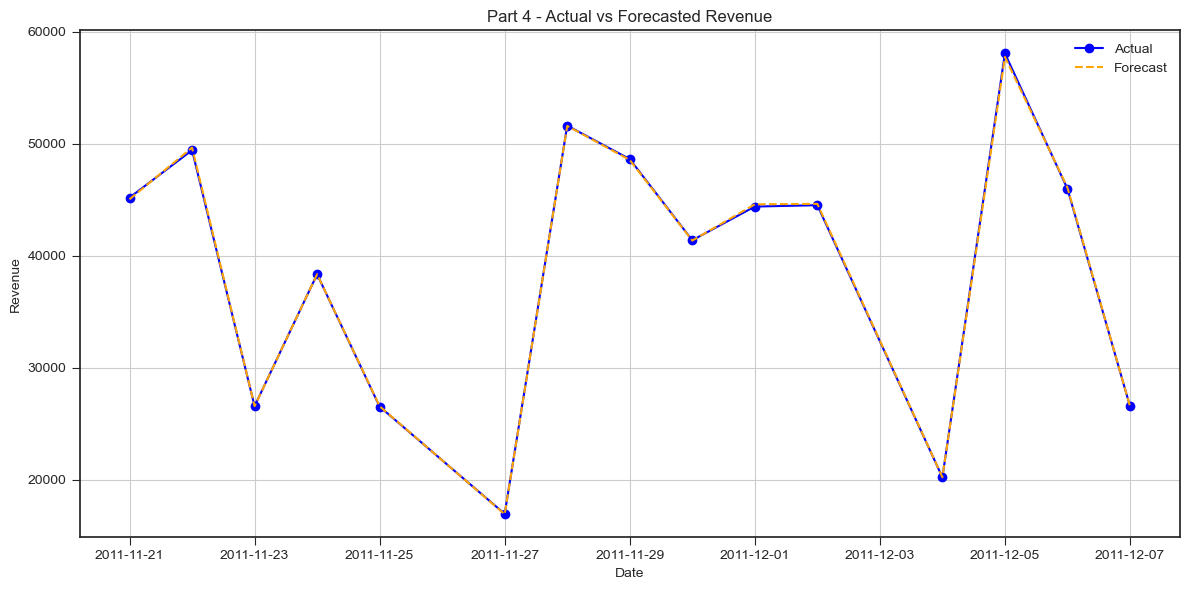

In [96]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Combine training and validation sets
train_val_data = pd.concat([train_data, val_data])

# Prepare features and target variables
X_train_val = train_val_data['Revenue'].values.reshape(-1, 1)
y_train_val = train_val_data['Revenue'].values

# Train Random Forest model on combined training and validation sets
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_val, y_train_val)

# Initialize lists to store forecasted values
forecast_list_rf = []

# Generate forecasts for each part of the test data
for part in test_parts:
    # Prepare features for the current part
    X_test = part['Revenue'].values.reshape(-1, 1)
    
    # Generate forecast using the trained model
    forecast_rf = model_rf.predict(X_test)
    forecast_list_rf.append(forecast_rf)

# Plot actual data and forecasted values for each part
for i, part in enumerate(test_parts):
    plt.figure(figsize=(12, 6))
    plt.plot(part['InvoiceDate'], part['Revenue'], label='Actual', linestyle='-', marker='o', color='blue')
    plt.plot(part['InvoiceDate'], forecast_list_rf[i], label='Forecast', linestyle='--', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(f'Part {i+1} - Actual vs Forecasted Revenue')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [97]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Define a function to calculate MAPE
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Initialize lists to store MAPEs, RMSEs, and forecasted values
mape_list_rf = []
rmse_list_rf = []
forecast_list_rf = []

# Train Random Forest models and generate forecasts for each part
for i, part in enumerate(test_parts):
    # Prepare features and target variables
    X_train = train_data['Revenue'].values.reshape(-1, 1)
    y_train = train_data['Revenue'].values
    X_test = part['Revenue'].values.reshape(-1, 1)
    
    # Train Random Forest model
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train)
    
    # Generate forecast
    forecast_rf = model_rf.predict(X_test)
    forecast_list_rf.append(forecast_rf)
    
    # Calculate MAPE and RMSE
    mape_rf = calculate_mape(part['Revenue'], forecast_rf)
    mape_list_rf.append(mape_rf)
    
    rmse_rf = np.sqrt(mean_squared_error(part['Revenue'], forecast_rf))
    rmse_list_rf.append(rmse_rf)
    
    print(f"Metrics for Random Forest - Part {i+1}: MAPE = {mape_rf:.2f}%, RMSE = {rmse_rf:.2f}")

Metrics for Random Forest - Part 1: MAPE = 0.08%, RMSE = 40.74
Metrics for Random Forest - Part 2: MAPE = 0.14%, RMSE = 122.71
Metrics for Random Forest - Part 3: MAPE = 0.55%, RMSE = 864.68
Metrics for Random Forest - Part 4: MAPE = 0.47%, RMSE = 725.81


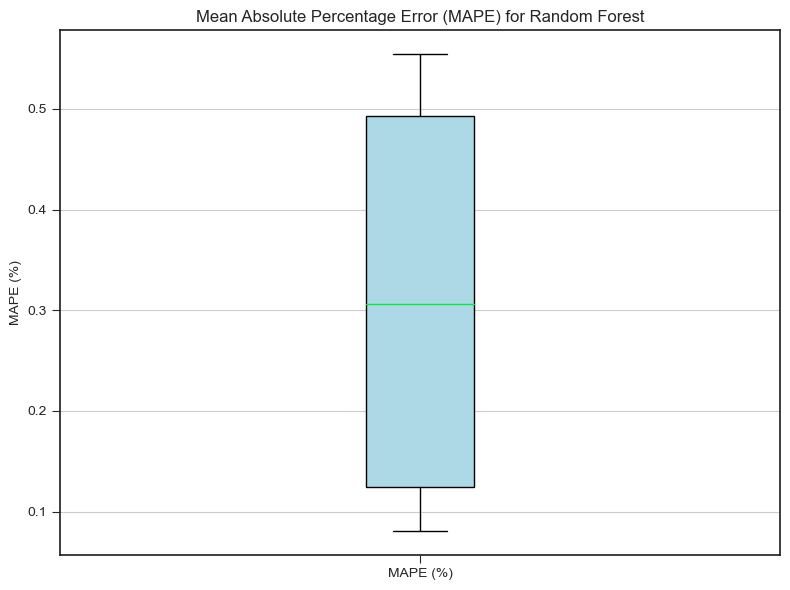

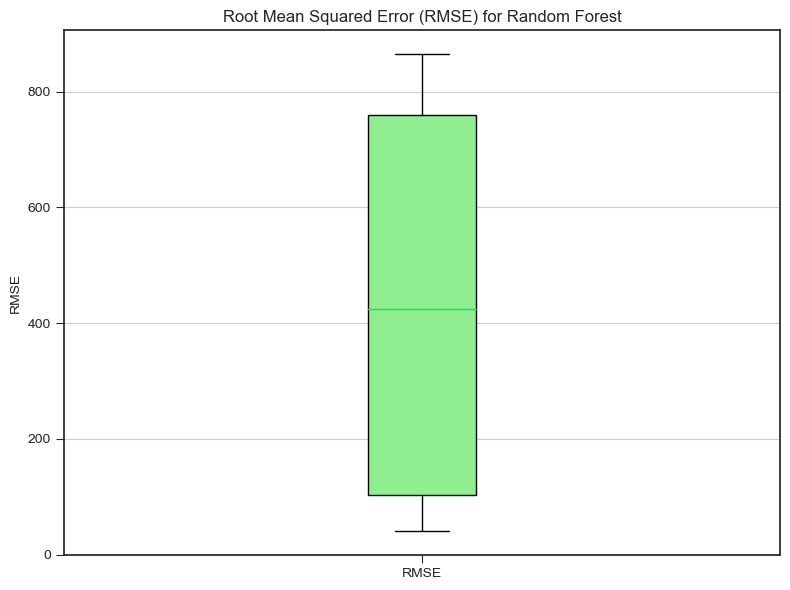

In [98]:
# Create a box plot of MAPEs for Random Forest
plt.figure(figsize=(8, 6))
plt.boxplot(mape_list_rf, labels=['MAPE (%)'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Mean Absolute Percentage Error (MAPE) for Random Forest')
plt.ylabel('MAPE (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create a box plot of RMSEs for Random Forest
plt.figure(figsize=(8, 6))
plt.boxplot(rmse_list_rf, labels=['RMSE'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Root Mean Squared Error (RMSE) for Random Forest')
plt.ylabel('RMSE')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Model: Facebook Prophet

In [99]:
from prophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error

# Assuming 'Revenue' is the target variable. Aggregate data to monthly level for forecasting
train_monthly = train_data.resample('M', on='InvoiceDate')['Revenue'].sum()
validation_monthly = val_data.resample('M', on='InvoiceDate')['Revenue'].sum()

# Prepare the data for Prophet
train_prophet = train_data.resample('M', on='InvoiceDate').sum().reset_index()[['InvoiceDate', 'Revenue']]
train_prophet.columns = ['ds', 'y']

# Initialize and fit the model
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model_prophet.fit(train_prophet)

# Make a future dataframe for the validation period and forecast
future = model_prophet.make_future_dataframe(periods=len(validation_monthly), freq='M')
forecast = model_prophet.predict(future)

# Calculate MAPE
validation_prophet = val_data.resample('M', on='InvoiceDate').sum().reset_index()
mape_prophet = mean_absolute_percentage_error(validation_prophet['Revenue'], forecast['yhat'][-len(validation_monthly):])
print(f"MAPE for Prophet: {mape_prophet}")

21:09:57 - cmdstanpy - INFO - Chain [1] start processing
21:09:57 - cmdstanpy - INFO - Chain [1] done processing


MAPE for Prophet: 0.8181498890190934


MAPE on the Test Set: 3.1777072434754134 %


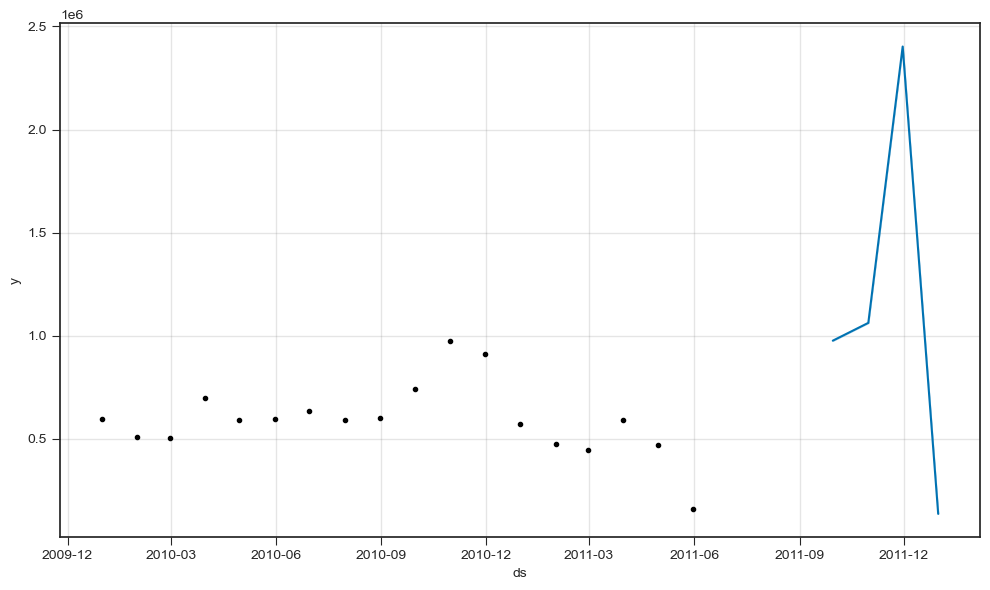

In [100]:
# Prepare test data
test_prophet = test_data.resample('M', on='InvoiceDate').sum().reset_index()[['InvoiceDate', 'Revenue']]
test_prophet.columns = ['ds', 'y']

# Use the previously trained Prophet model to forecast on the test set
test_forecast = model_prophet.predict(test_prophet)

# Calculate and print the MAPE for the test set
mape_test = mean_absolute_percentage_error(test_prophet['y'], test_forecast['yhat'])
print(f"MAPE on the Test Set: {mape_test} %")

# Optional: Plotting the forecast
fig = model_prophet.plot(test_forecast)

Now, we calculate MAPE based on the different regions:

In [101]:
# Prepare the training and validation set for Prophet
train_prophet = train_data[['InvoiceDate', 'Revenue']].rename(columns={'InvoiceDate': 'ds', 'Revenue': 'y'})
validation_prophet = val_data[['InvoiceDate', 'Revenue']].rename(columns={'InvoiceDate': 'ds', 'Revenue': 'y'})

In [102]:
# Assuming the test set is sorted by 'InvoiceDate'
test_parts = np.array_split(test_data, 4)

21:09:58 - cmdstanpy - INFO - Chain [1] start processing
21:09:58 - cmdstanpy - INFO - Chain [1] done processing


Below are the Mean Absolute Percentage Error (MAPE) values in each of the four regions of the test data:
Region 1: 0.39%
Region 2: 0.41%
Region 3: 0.41%
Region 4: 0.43%


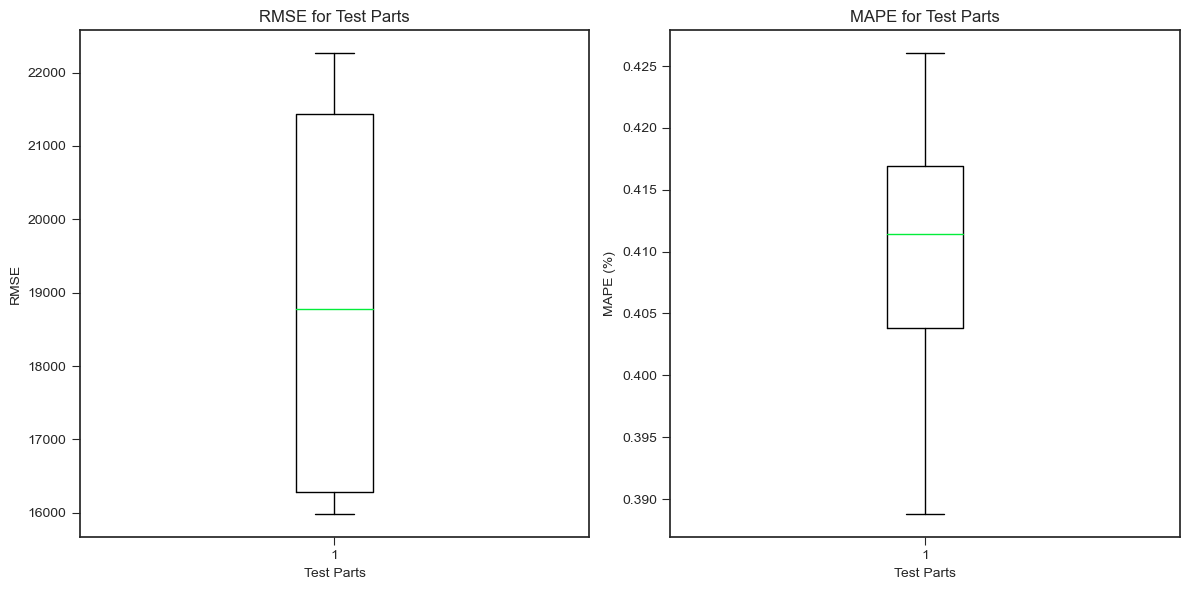

In [103]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Combine training and validation sets
combined = pd.concat([train_prophet, validation_prophet])

# Fit the model on combined training and validation data
model = Prophet()
model.fit(combined)

# Initialize lists for storing metrics
rmse_list = []
mape_list = []

# Loop through each part of the test set
for i, part in enumerate(test_parts):
    # Prepare the part for Prophet
    part_prophet = part[['InvoiceDate', 'Revenue']].rename(columns={'InvoiceDate': 'ds', 'Revenue': 'y'})
    
    # Make predictions
    future = model.make_future_dataframe(periods=len(part_prophet), freq='D', include_history=False)
    forecast = model.predict(future)
    
    # Calculate RMSE and MAPE
    rmse = np.sqrt(mean_squared_error(part_prophet['y'], forecast['yhat'][:len(part_prophet)]))
    mape = mean_absolute_percentage_error(part_prophet['y'], forecast['yhat'][:len(part_prophet)])
    
    rmse_list.append(rmse)
    mape_list.append(mape)

# Plot RMSE and MAPE box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(rmse_list)
plt.title('RMSE for Test Parts')
plt.xlabel('Test Parts')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.boxplot(mape_list)
plt.title('MAPE for Test Parts')
plt.xlabel('Test Parts')
plt.ylabel('MAPE (%)')

# Print the header
print("Below are the Mean Absolute Percentage Error (MAPE) values in each of the four regions of the test data:")

# Print MAPE values for each region
for i, mape in enumerate(mape_list):
    print(f"Region {i+1}: {mape:.2f}%")


plt.tight_layout()
plt.show()

In [104]:
import pandas as pd

# Assuming 'InvoiceDate' is the name of the column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [105]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Identify the Date Range of Test Data
test_start_date = test_data['InvoiceDate'].min()
test_end_date = test_data['InvoiceDate'].max()

# Prepare the training data (data before the test period)
train = df[df['InvoiceDate'] < test_start_date]

# Convert training data for Prophet
train_prophet = train[['InvoiceDate', 'Revenue']].rename(columns={'InvoiceDate': 'ds', 'Revenue': 'y'})

# Step 2: Train Prophet Model
model = Prophet()
model.fit(train_prophet)

21:09:58 - cmdstanpy - INFO - Chain [1] start processing
21:09:58 - cmdstanpy - INFO - Chain [1] done processing


In [106]:
# Create future dataframe for the period of the test data
future_dates = model.make_future_dataframe(periods=(test_end_date - test_start_date).days, freq='D', include_history=False)

# Predict
forecast = model.predict(future_dates)

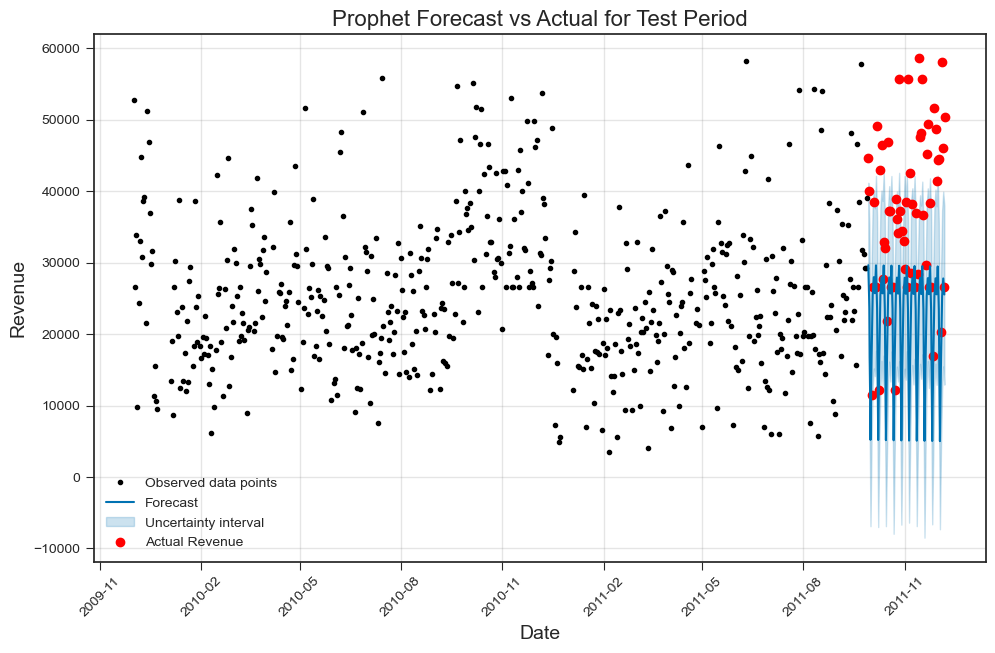

In [107]:
# Plot the forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Prophet Forecast vs Actual for Test Period', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45)

# Overlay actual revenue on the plot
test_actual = test_data[['InvoiceDate', 'Revenue']].rename(columns={'InvoiceDate': 'ds', 'Revenue': 'y'})
plt.scatter(test_actual['ds'], test_actual['y'], color='red', label='Actual Revenue')

# Adjust legend
plt.legend()

plt.show()

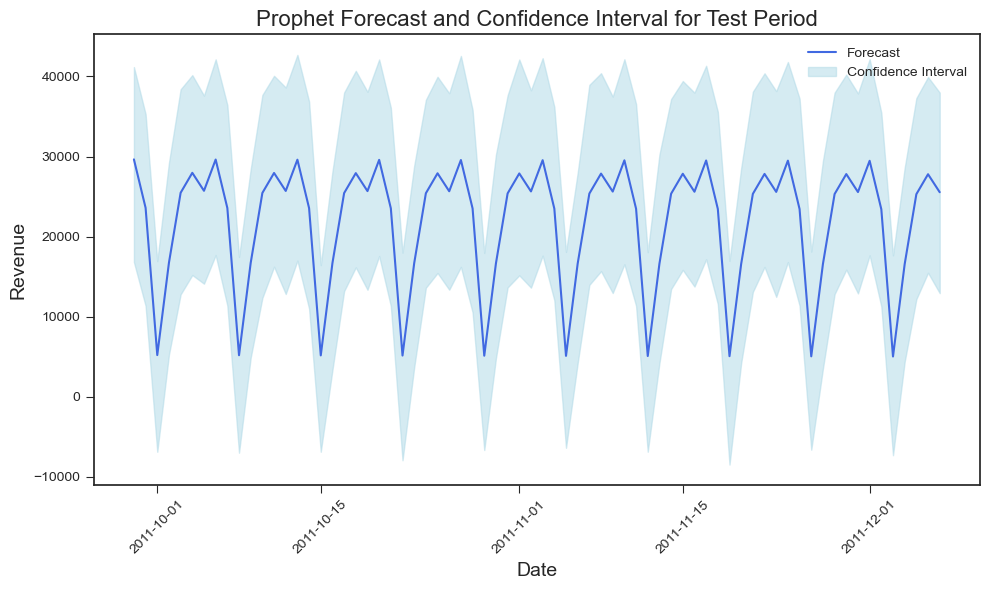

In [108]:
import matplotlib.pyplot as plt

# Assuming 'forecast' contains your Prophet forecast for the test period

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the forecast line
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='royalblue', linestyle='-', marker='')

# Plot the confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.5, label='Confidence Interval')

plt.title('Prophet Forecast and Confidence Interval for Test Period', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.legend()
plt.tight_layout()
plt.show()
